In [1]:
import pandas as pd
from fontTools.subset import subset

movie_df = pd.read_csv("movies_data_processed.csv")
print(movie_df.info())
movie_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4996 non-null   object 
 1   genres        4996 non-null   object 
 2   type          4996 non-null   object 
 3   rating        4863 non-null   float64
 4   no_of_votes   4863 non-null   float64
 5   meta_score    2143 non-null   float64
 6   release_date  4946 non-null   float64
 7   gross         2084 non-null   float64
 8   budget        1805 non-null   float64
 9   countries     4969 non-null   object 
 10  url           4996 non-null   object 
 11  ROI           1612 non-null   float64
 12  result        4996 non-null   object 
dtypes: float64(7), object(6)
memory usage: 507.5+ KB
None


name                                             genres  \
0         Attack on Titan  Action Epic, Adult Animation, Anime, Shōnen, S...   
1              Love Hurts                       Martial Arts, Action, Comedy   
2  The Quick and the Dead          Action, Drama, Romance, Thriller, Western   
3           The Equalizer  Cop Drama, Police Procedural, Action, Crime, D...   
4              Goosebumps  Teen Horror, Action, Adventure, Comedy, Drama,...   

        type  rating  no_of_votes  meta_score  release_date       gross  \
0  TV Series     9.1     591000.0         NaN        2013.0         NaN   
1      Movie     5.3       6800.0        34.0        2025.0  17235040.0   
2      Movie     6.5     107000.0        49.0        1995.0  18636537.0   
3  TV Series     5.6      19000.0         NaN        2021.0         NaN   
4  TV Series     6.7      15000.0         NaN        2023.0         NaN   

       budget                      countries  \
0         NaN                          Japan   
1  18000000.0                  United States   
2  32000000.0           United States, Japan   
3         NaN                  United States   
4         NaN  United States, Canada, France   

                                                 url       ROI   result  
0  https://www.imdb.com/title/tt2560140/?ref_=sr_...       NaN  Success  
1  https://www.imdb.com/title/tt30788842/?ref_=sr... -0.042498     Fail  
2  https://www.imdb.com/title/tt0114214/?ref_=sr_... -0.417608  Success  
3  https://www.imdb.com/title/tt11242246/?ref_=sr...       NaN     Fail  
4  https://www.imdb.com/title/tt17720272/?ref_=sr...       NaN     Fail

In [2]:
movie_df.describe()

rating   no_of_votes   meta_score  release_date         gross  \
count  4863.000000  4.863000e+03  2143.000000   4946.000000  2.084000e+03   
mean      7.023648  1.136749e+05    64.732618   2004.230287  1.444532e+08   
std       1.132677  2.464047e+05    16.460004     22.117403  2.640154e+08   
min       1.500000  6.000000e+00    10.000000   1915.000000  1.900000e+01   
25%       6.500000  2.100000e+03    53.000000   1996.000000  6.456224e+06   
50%       7.200000  2.000000e+04    65.000000   2012.000000  4.413948e+07   
75%       7.800000  1.100000e+05    77.000000   2021.000000  1.610557e+08   
max       9.600000  3.000000e+06   100.000000   2027.000000  2.923711e+09   

             budget          ROI  
count  1.805000e+03  1612.000000  
mean   4.586206e+07     4.551094  
std    5.665352e+07    14.351137  
min    1.000000e+04    -0.999983  
25%    8.000000e+06     0.107132  
50%    2.500000e+07     1.689598  
75%    6.000000e+07     4.276975  
max    4.149000e+08   316.627031

In [3]:
filtered_movies = movie_df[(movie_df["release_date"] >= 2010) & (movie_df["release_date"] <= 2024)].dropna(subset=["genres"])

In [42]:
from collections import Counter
import pandas as pd


list_genres = []
for genres in filtered_movies['genres'].dropna():
    list_genres.extend(genres.split(', '))

genres_count = Counter(list_genres)
len(genres_count)

200

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


genres_df = pd.DataFrame(genres_count.items(), columns=["Genre", "Count"])
top_10_genres_df = genres_df.sort_values(by="Count", ascending=False)[:20]
top_10_genres_df

Genre  Count
9           Drama   1094
16         Comedy    718
7       Adventure    515
6          Action    503
14       Thriller    423
17        Fantasy    351
8       Animation    346
12          Crime    329
25         Family    301
13        Mystery    281
19         Sci-Fi    279
48        Romance    278
163    Reality TV    275
92      Biography    271
148   Documentary    246
38        History    234
18         Horror    218
134         Short    203
37   Period Drama    187
174     Game Show    169

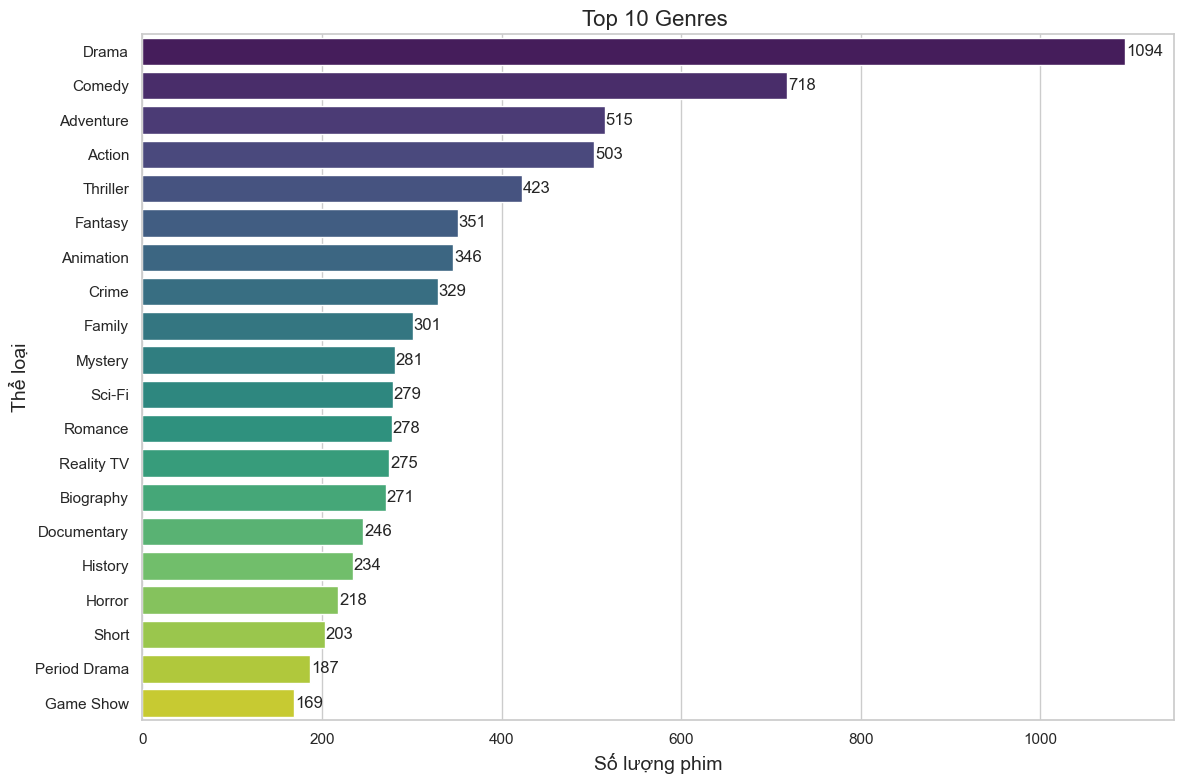

In [33]:
plt.figure(figsize=(12, 8))  # tăng kích thước để tránh chồng lấn

sns.barplot(
    data=top_10_genres_df,
    x="Count",
    y="Genre",
    palette="viridis",
    legend=False,
    hue = "Genre"
)

plt.title("Top 10 Genres ", fontsize=16)
plt.xlabel("Số lượng phim", fontsize=14) 
plt.ylabel("Thể loại", fontsize=14)

# Thêm nhãn số lượng lên trên các cột
for idx, (genre, count) in enumerate(zip(top_10_genres_df["Genre"], top_10_genres_df["Count"])):
    plt.text(count + 1, idx, count, va='center')

plt.tight_layout()
plt.show()

In [34]:

genres_per_year = [
    (row["release_date"], genre, row["rating"], row["no_of_votes"], row["meta_score"], row["result"], row["gross"])
    for _, row in filtered_movies.iterrows()
    for genre in row["genres"].split(", ")
]

genres_per_year_df = pd.DataFrame(genres_per_year, columns=["Year", "Genre", "rating", "no_of_votes", "meta_score", "result", "gross"])
genres_per_year_df
    

Year            Genre  rating  no_of_votes  meta_score   result  \
0      2013.0      Action Epic     9.1     591000.0         NaN  Success   
1      2013.0  Adult Animation     9.1     591000.0         NaN  Success   
2      2013.0            Anime     9.1     591000.0         NaN  Success   
3      2013.0           Shōnen     9.1     591000.0         NaN  Success   
4      2013.0         Survival     9.1     591000.0         NaN  Success   
...       ...              ...     ...          ...         ...      ...   
11704  2016.0            Drama     7.6     263000.0        88.0  Success   
11705  2016.0         Thriller     7.6     263000.0        88.0  Success   
11706  2016.0          Western     7.6     263000.0        88.0  Success   
11707  2016.0            Drama     5.8      12000.0        42.0     Fail   
11708  2016.0          Western     5.8      12000.0        42.0     Fail   

            gross  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
11704  37999675.0  
11705  37999675.0  
11706  37999675.0  
11707     20672.0  
11708     20672.0  

[11709 rows x 7 columns]

In [35]:
# Tính toán các chỉ số theo Year và Genre
agg_df = genres_per_year_df.groupby(["Year", "Genre"]).agg(
    count=('Genre', 'size'),
    avg_rating=('rating', 'mean'),
    avg_no_of_votes=('no_of_votes', 'mean'),
    avg_meta_score=('meta_score', 'mean'),
    avg_gross=('gross', 'mean'),
    success_count=('result', lambda x: (x == 'Success').sum())
).reset_index()

# Thêm tỷ lệ success/tổng phim
agg_df['success_rate'] = agg_df['success_count'] / agg_df['count']

agg_df.head()

Year            Genre  count  avg_rating  avg_no_of_votes  \
0  2010.0           Action     19    7.305263     3.008947e+05   
1  2010.0      Action Epic      1    8.800000     2.700000e+06   
2  2010.0  Adult Animation      4    8.250000     5.550000e+04   
3  2010.0        Adventure     18    7.527778     3.980722e+05   
4  2010.0   Adventure Epic      1    8.800000     2.700000e+06   

   avg_meta_score    avg_gross  success_count  success_rate  
0       60.250000  202958115.3             13      0.684211  
1       74.000000  839030630.0              1      1.000000  
2             NaN     214180.0              4      1.000000  
3       66.111111  637830318.0             16      0.888889  
4       74.000000  839030630.0              1      1.000000

In [36]:
filtered_agg_df = agg_df[agg_df['Genre'].isin(top_10_genres_df["Genre"].to_list())]
filtered_agg_df

Year       Genre  count  avg_rating  avg_no_of_votes  avg_meta_score  \
0     2010.0      Action     19    7.305263    300894.736842       60.250000   
3     2010.0   Adventure     18    7.527778    398072.222222       66.111111   
6     2010.0   Animation     13    7.730769    222161.538462       71.200000   
8     2010.0   Biography      9    7.522222    298500.000000       73.000000   
14    2010.0      Comedy     31    7.522581    129962.774194       67.272727   
...      ...         ...    ...         ...              ...             ...   
1776  2024.0  Reality TV     35    6.694118      1107.558824             NaN   
1778  2024.0     Romance     34    6.838235     51280.500000       69.000000   
1782  2024.0      Sci-Fi     41    6.792683    103416.609756       59.000000   
1787  2024.0       Short      6    6.950000        78.666667             NaN   
1820  2024.0    Thriller     77    6.316883     66799.077922       61.288136   

         avg_gross  success_count  success_rate  
0     2.029581e+08             13      0.684211  
3     6.378303e+08             16      0.888889  
6     5.463330e+08             12      0.923077  
8     1.632224e+08              8      0.888889  
14    2.672311e+08             27      0.870968  
...            ...            ...           ...  
1776           NaN             10      0.285714  
1778  1.062564e+08             21      0.617647  
1782  3.069987e+08             28      0.682927  
1787           NaN              4      0.666667  
1820  7.868985e+07             45      0.584416  

[300 rows x 9 columns]

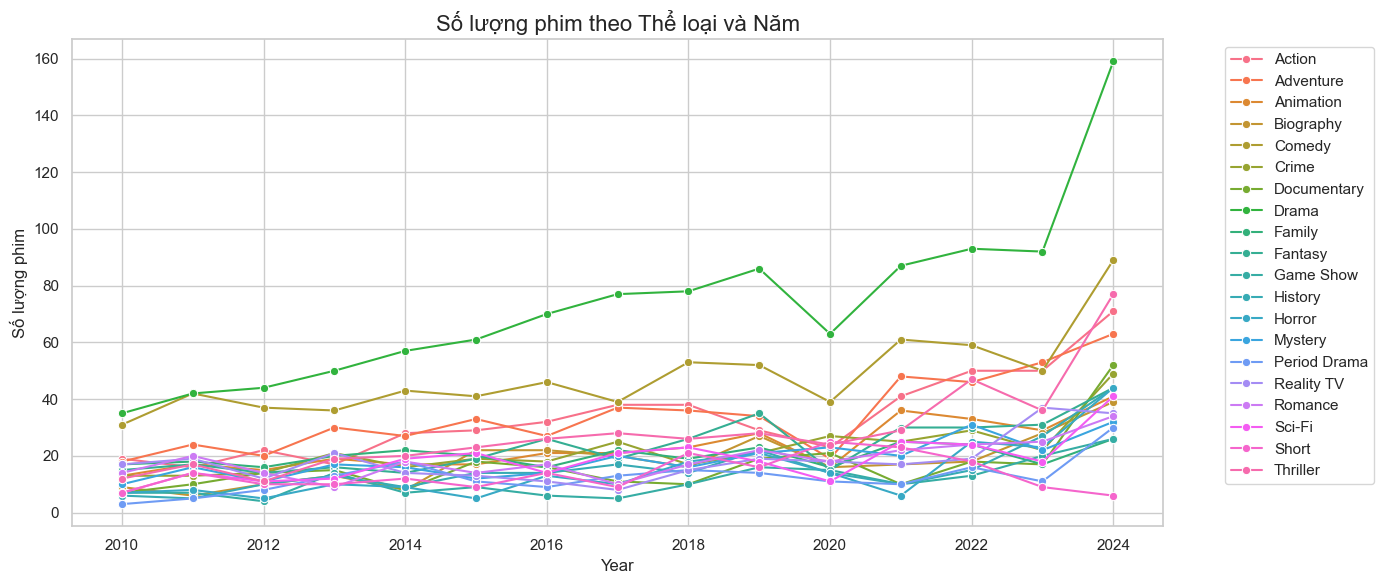

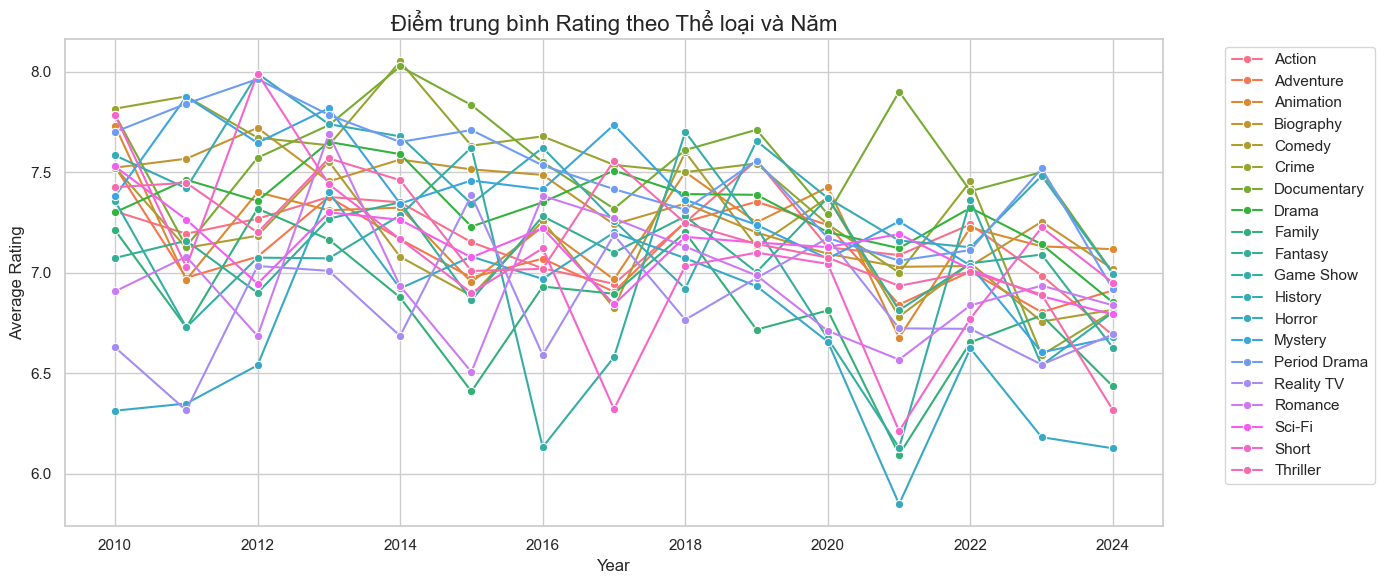

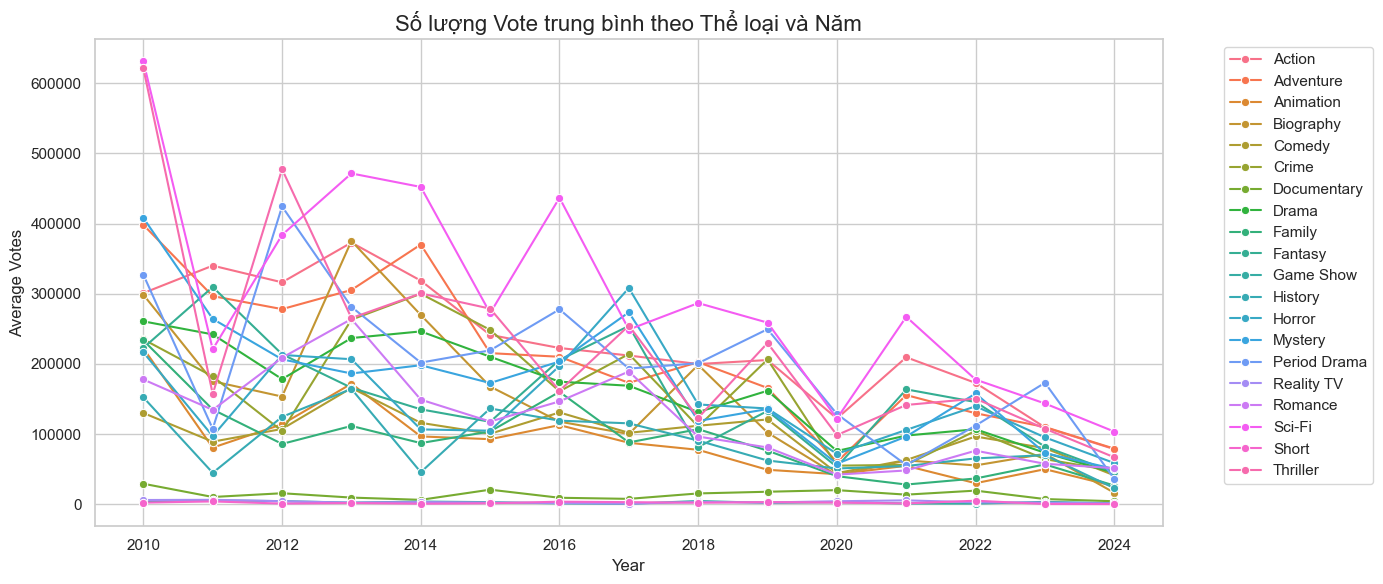

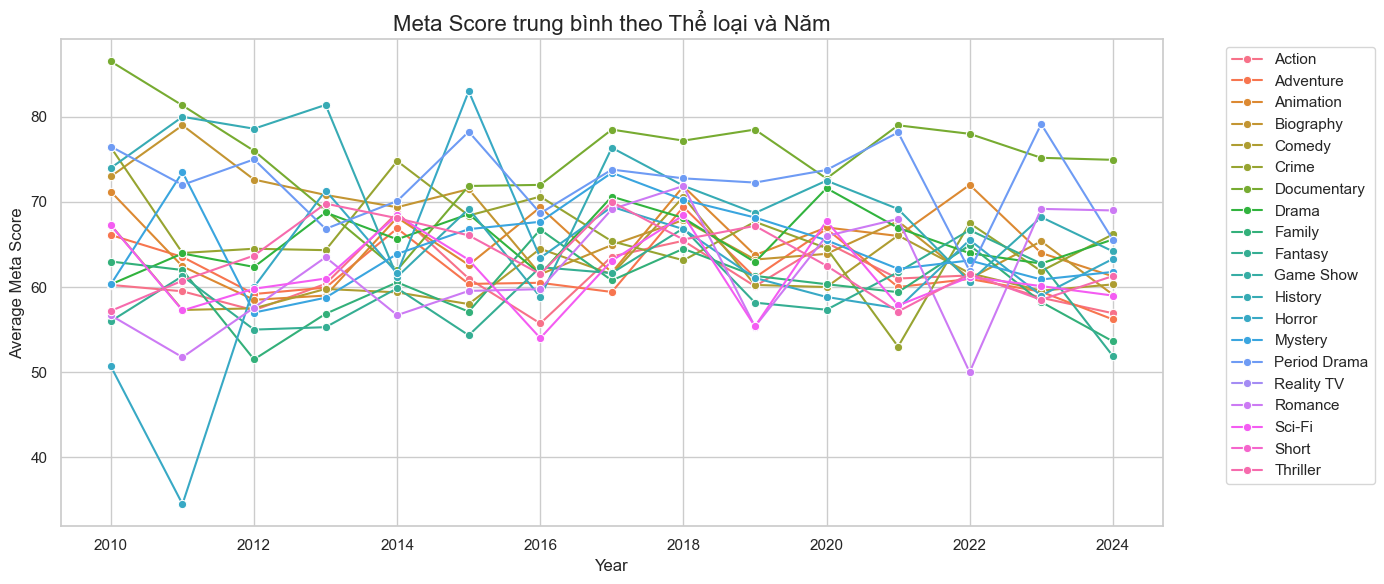

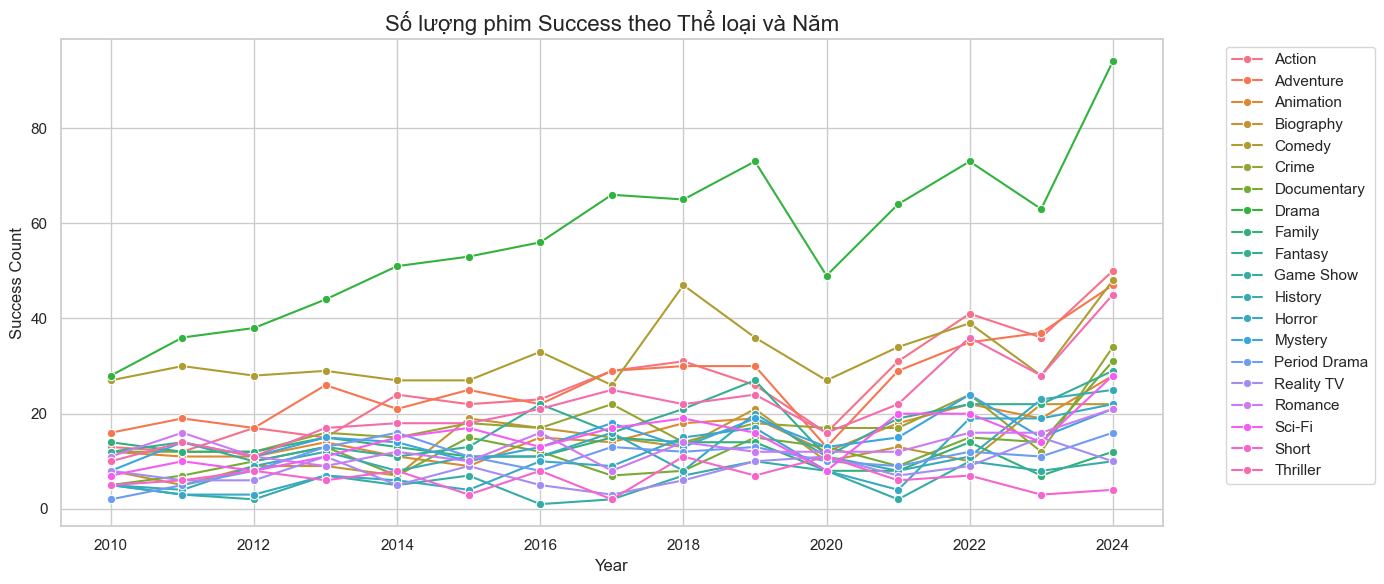

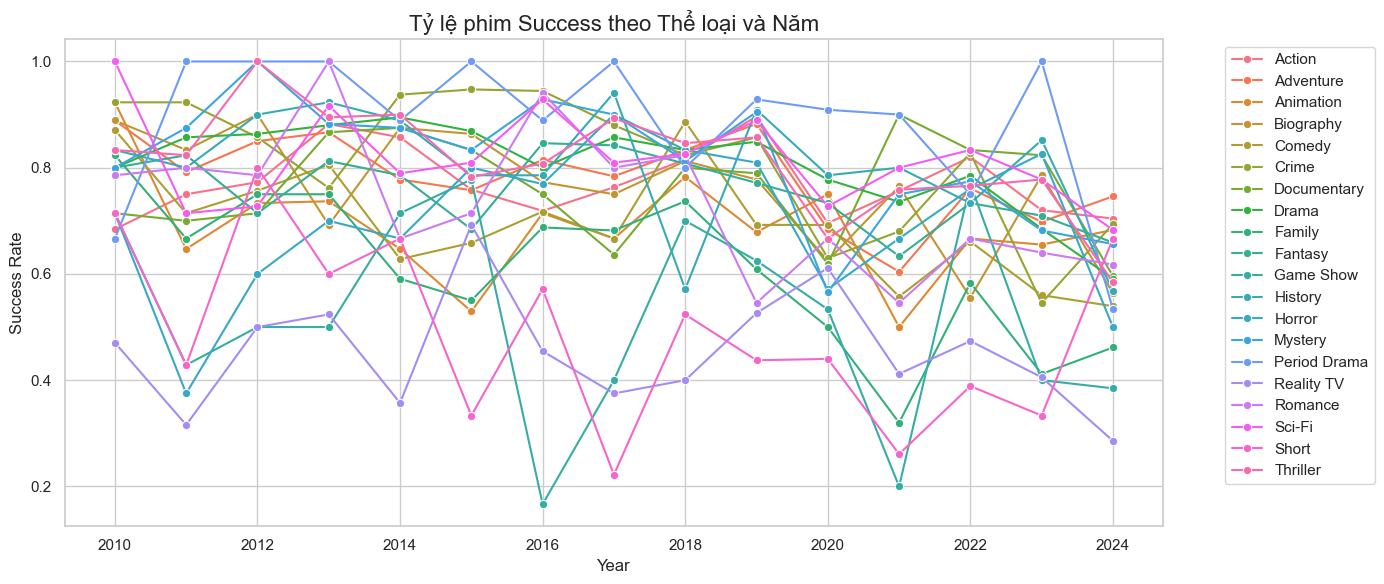

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style cho đẹp
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

def plot_line(df, y_col, title, ylabel):
    plt.figure()
    sns.lineplot(data=df, x='Year', y=y_col, hue='Genre', marker='o')
    plt.title(title, fontsize=16)
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Đẩy legend ra ngoài
    plt.tight_layout()
    plt.show()

# 1. Số lượng phim
plot_line(filtered_agg_df, 'count', 'Số lượng phim theo Thể loại và Năm', 'Số lượng phim')

# 2. Trung bình rating
plot_line(filtered_agg_df, 'avg_rating', 'Điểm trung bình Rating theo Thể loại và Năm', 'Average Rating')

# 3. Trung bình số lượng vote
plot_line(filtered_agg_df, 'avg_no_of_votes', 'Số lượng Vote trung bình theo Thể loại và Năm', 'Average Votes')

# 4. Trung bình meta_score
plot_line(filtered_agg_df, 'avg_meta_score', 'Meta Score trung bình theo Thể loại và Năm', 'Average Meta Score')

# 5. Số lượng Success
plot_line(filtered_agg_df, 'success_count', 'Số lượng phim Success theo Thể loại và Năm', 'Success Count')

# 6. Tỷ lệ Success
plot_line(filtered_agg_df, 'success_rate', 'Tỷ lệ phim Success theo Thể loại và Năm', 'Success Rate')


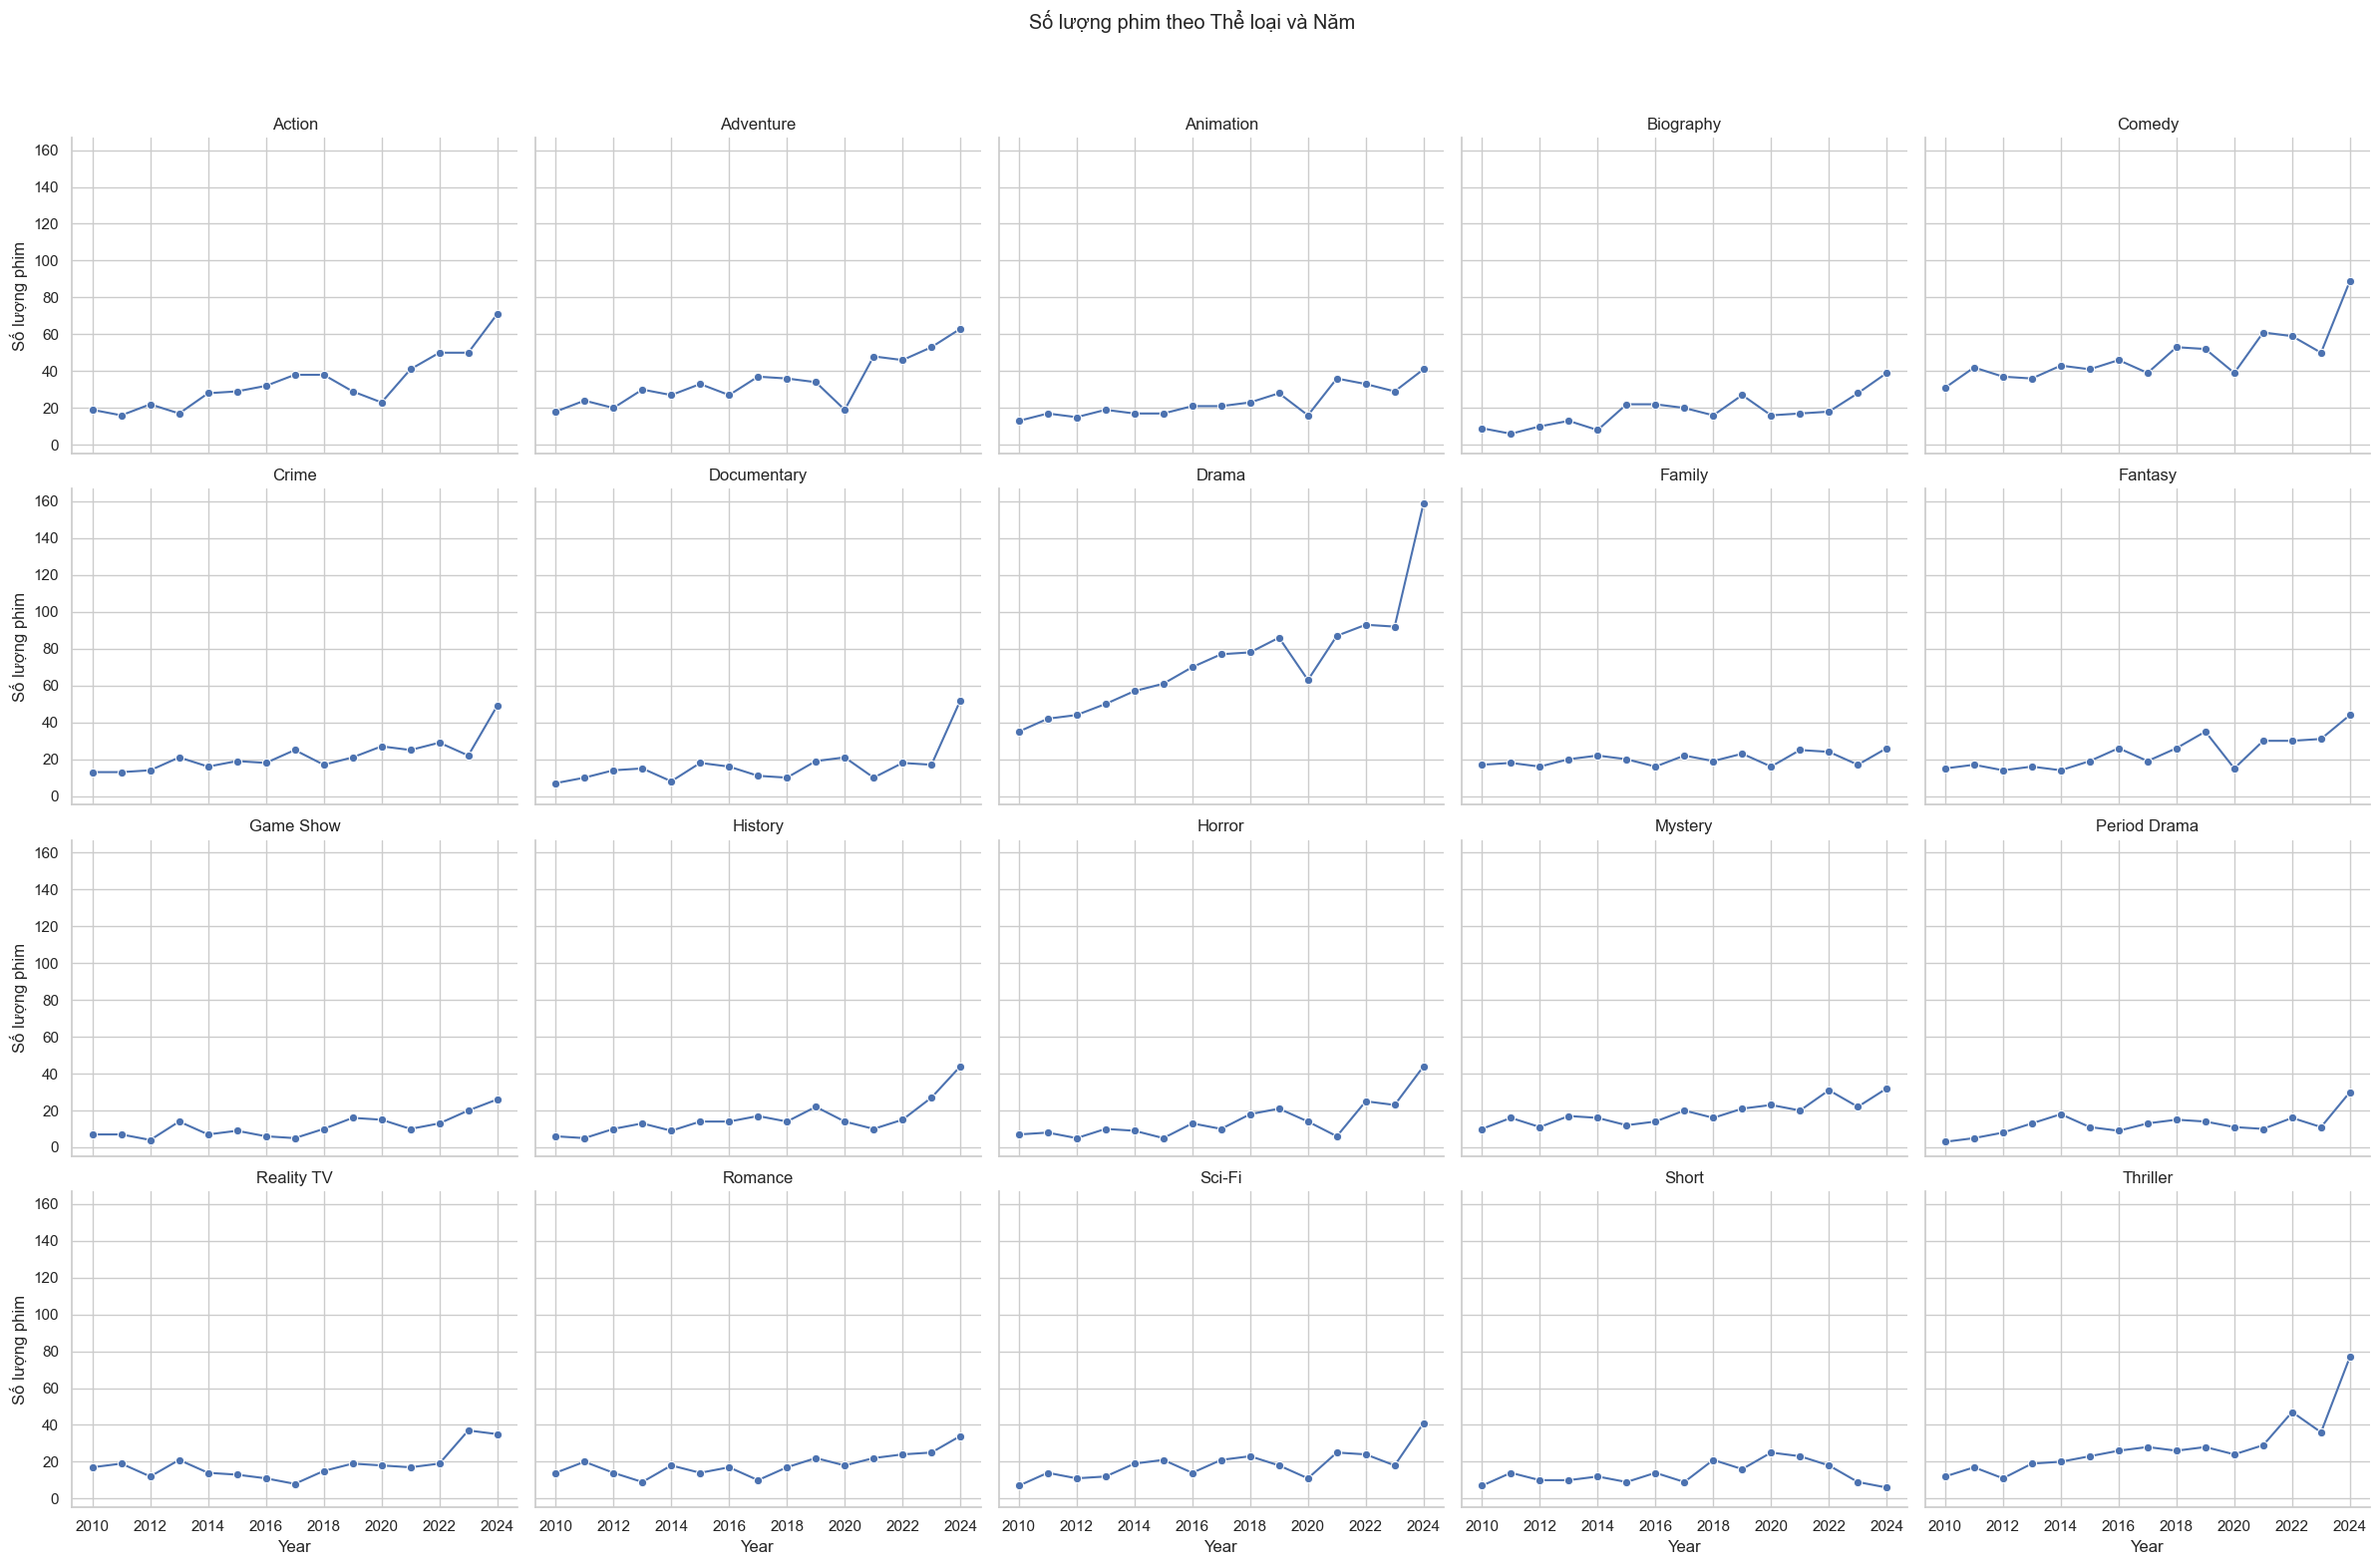

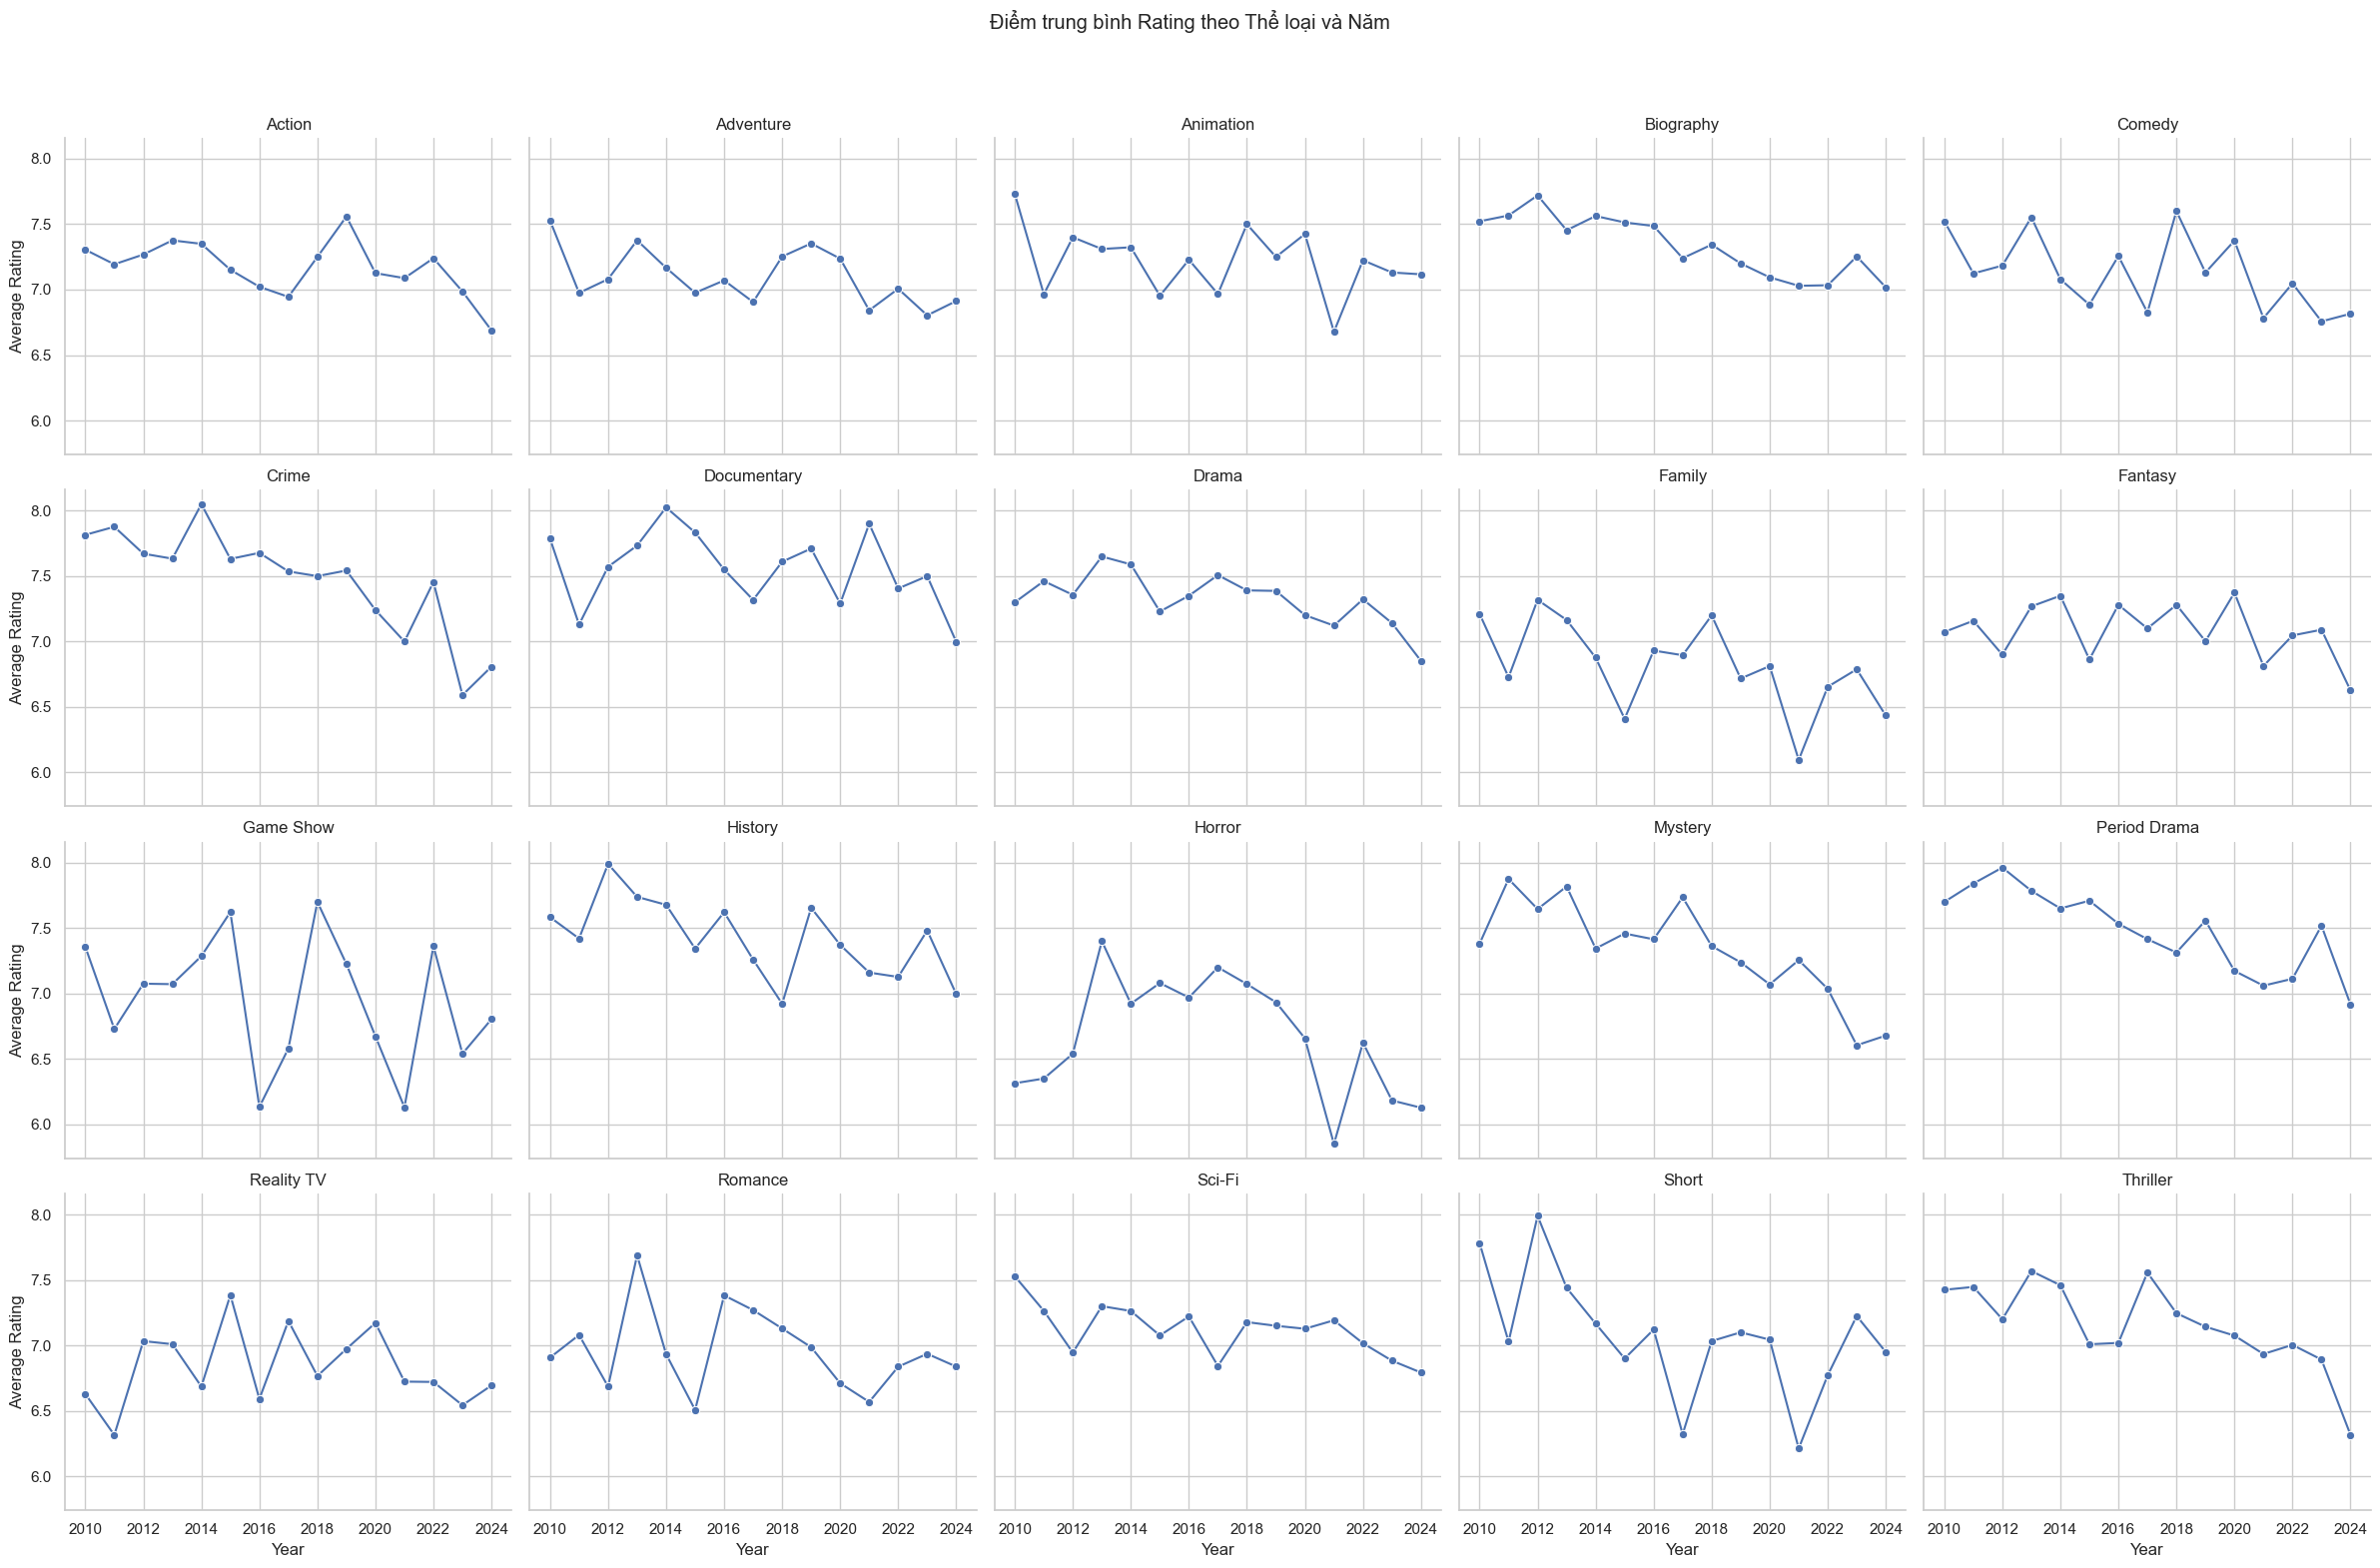

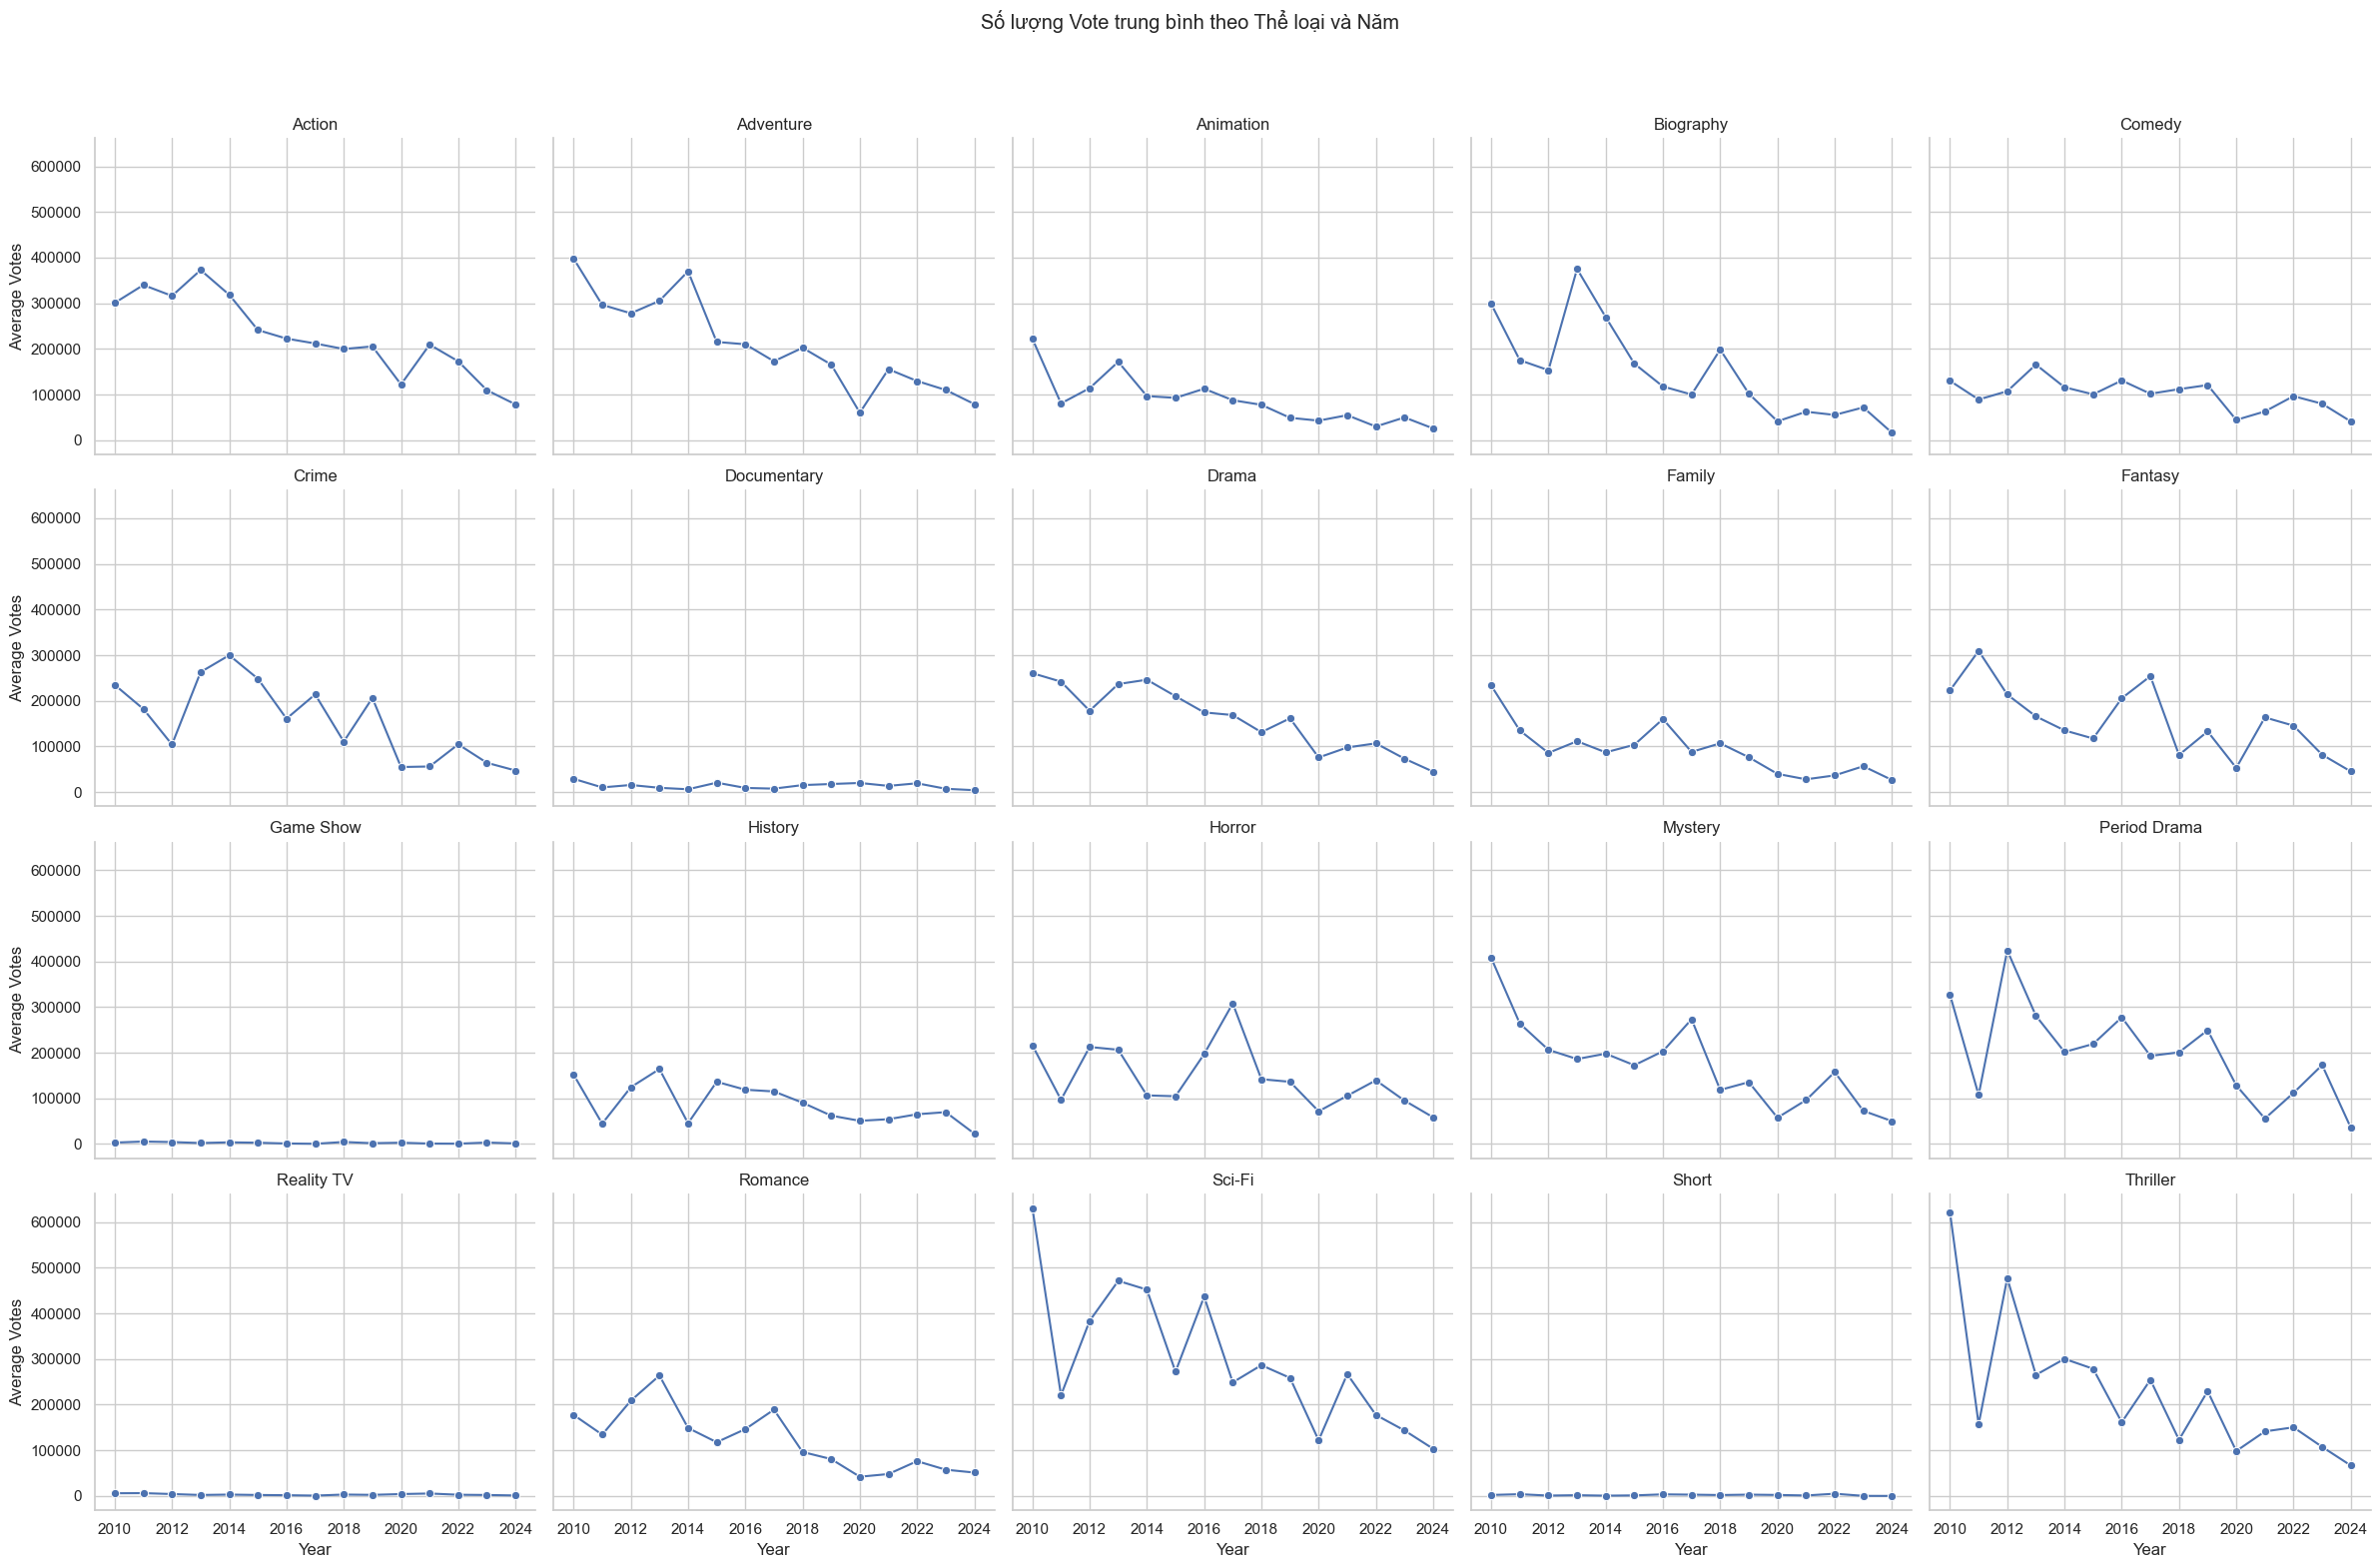

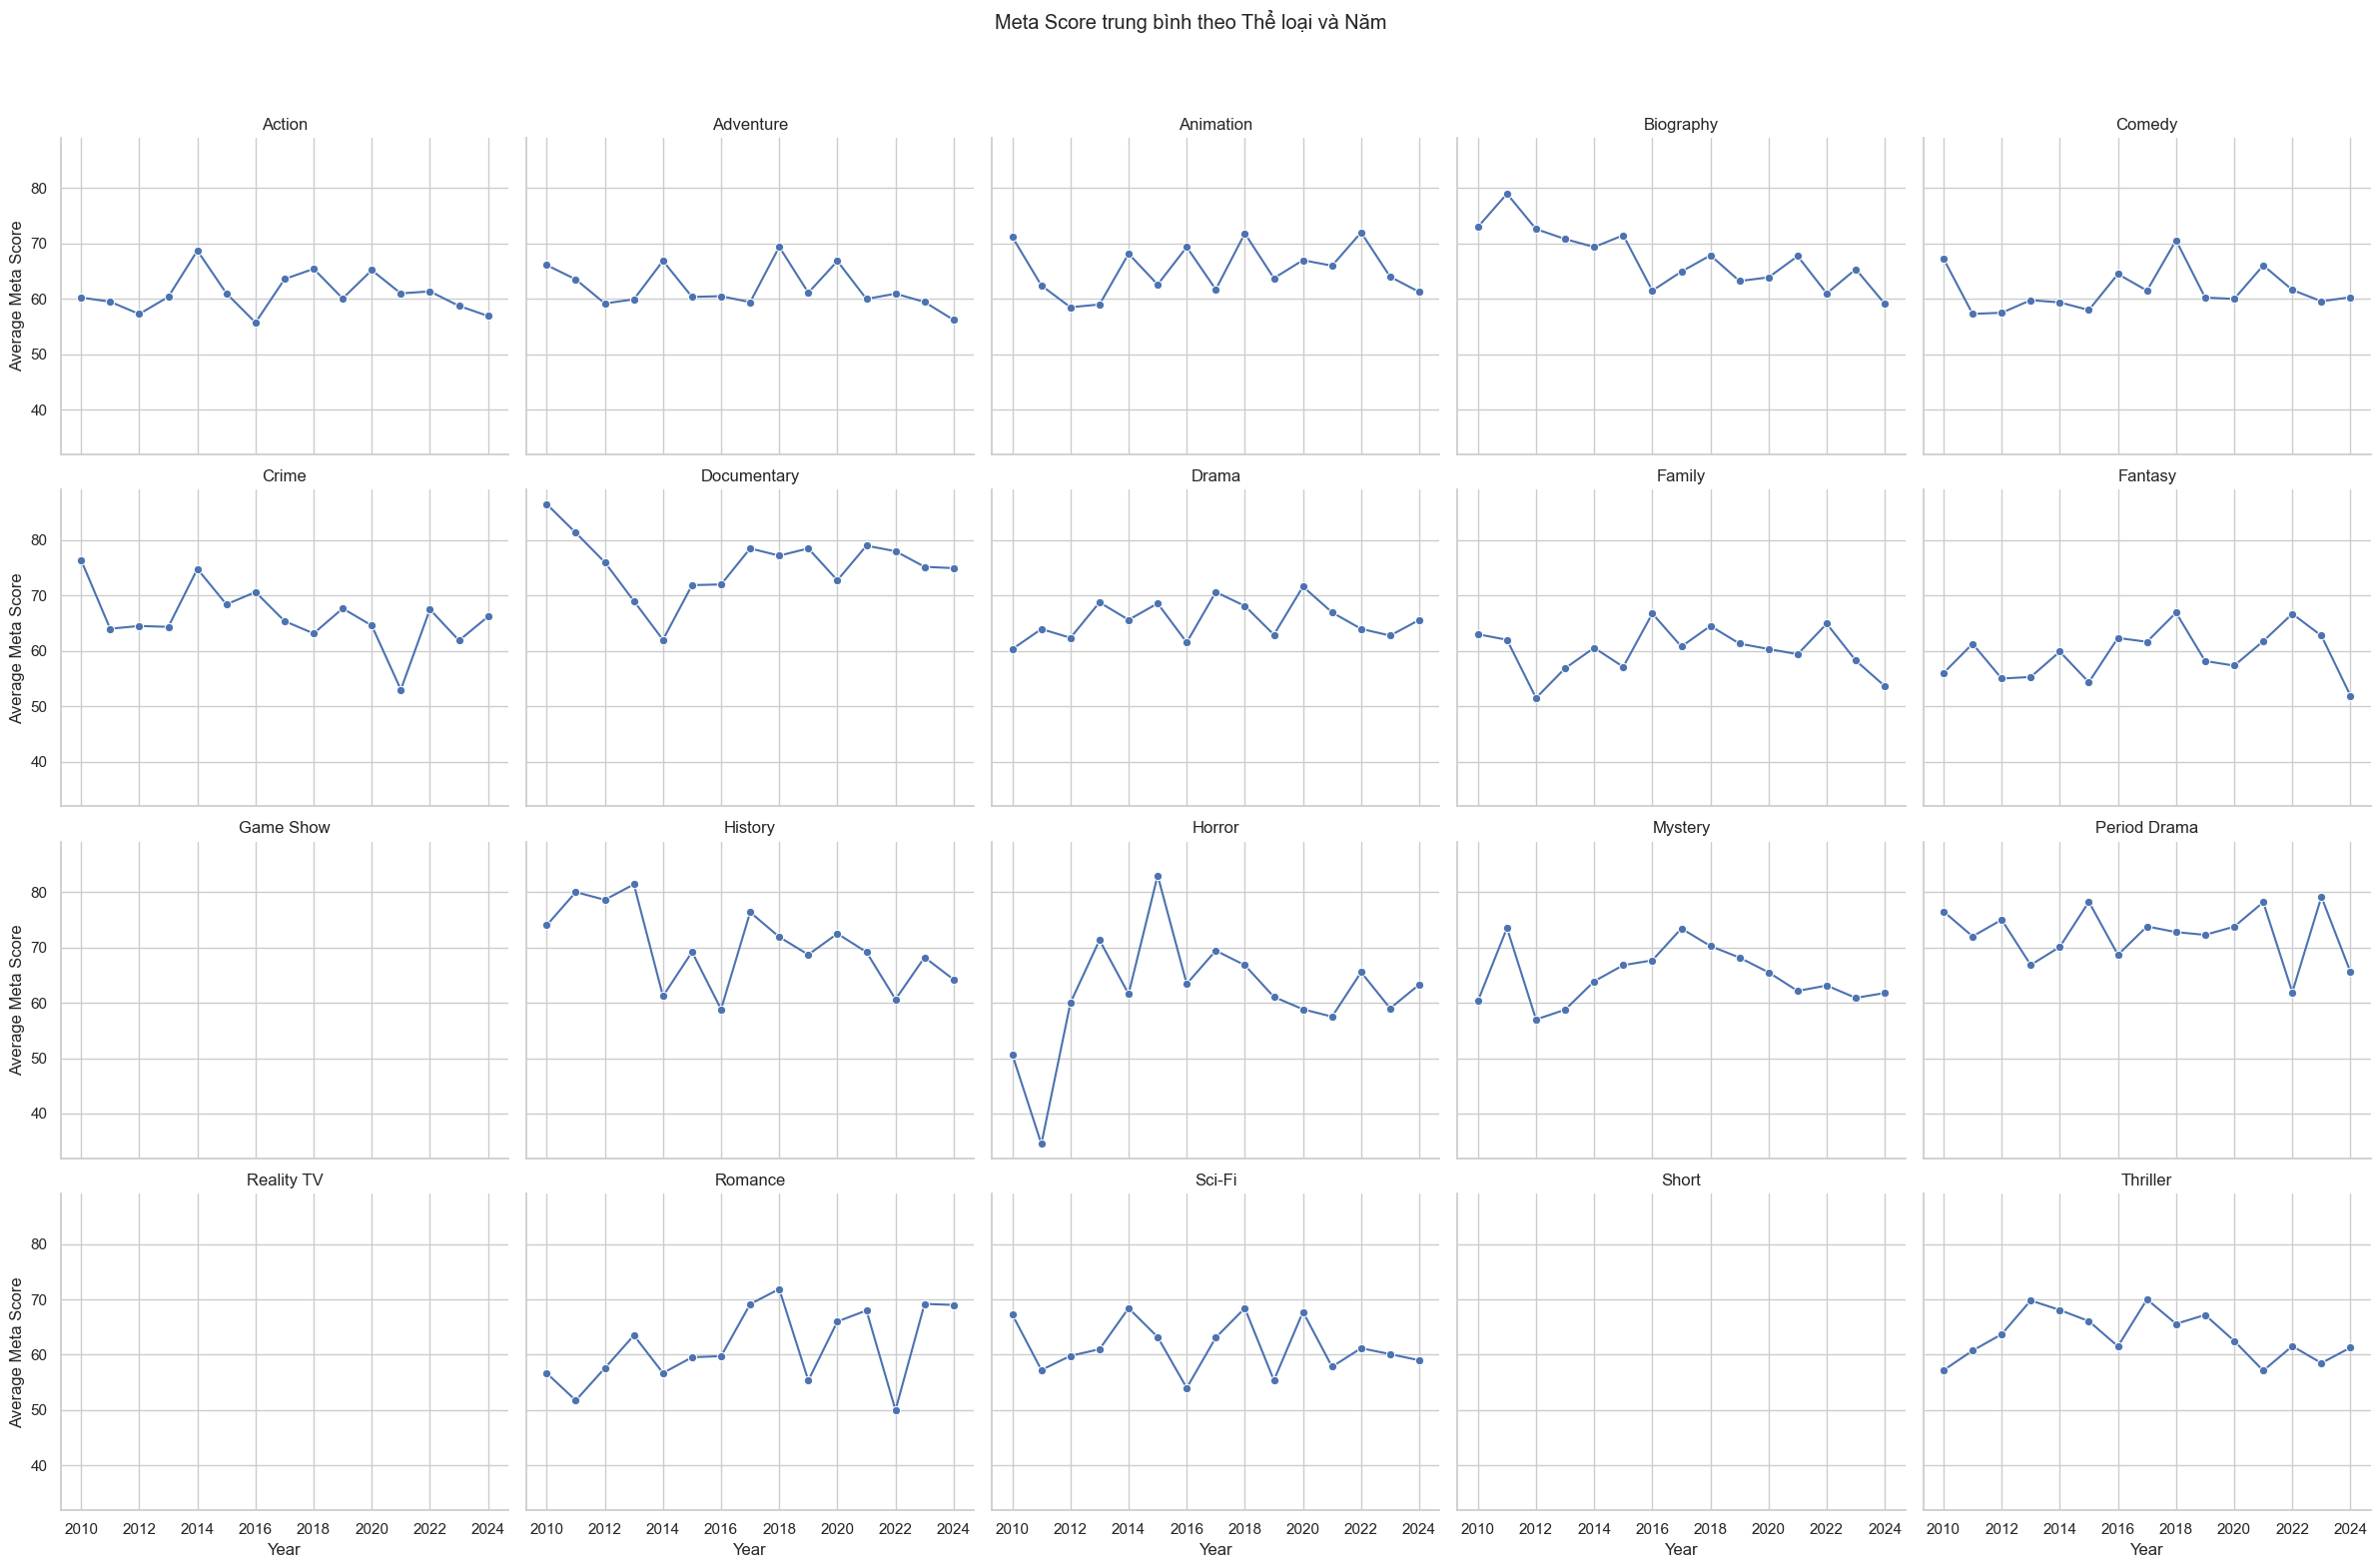

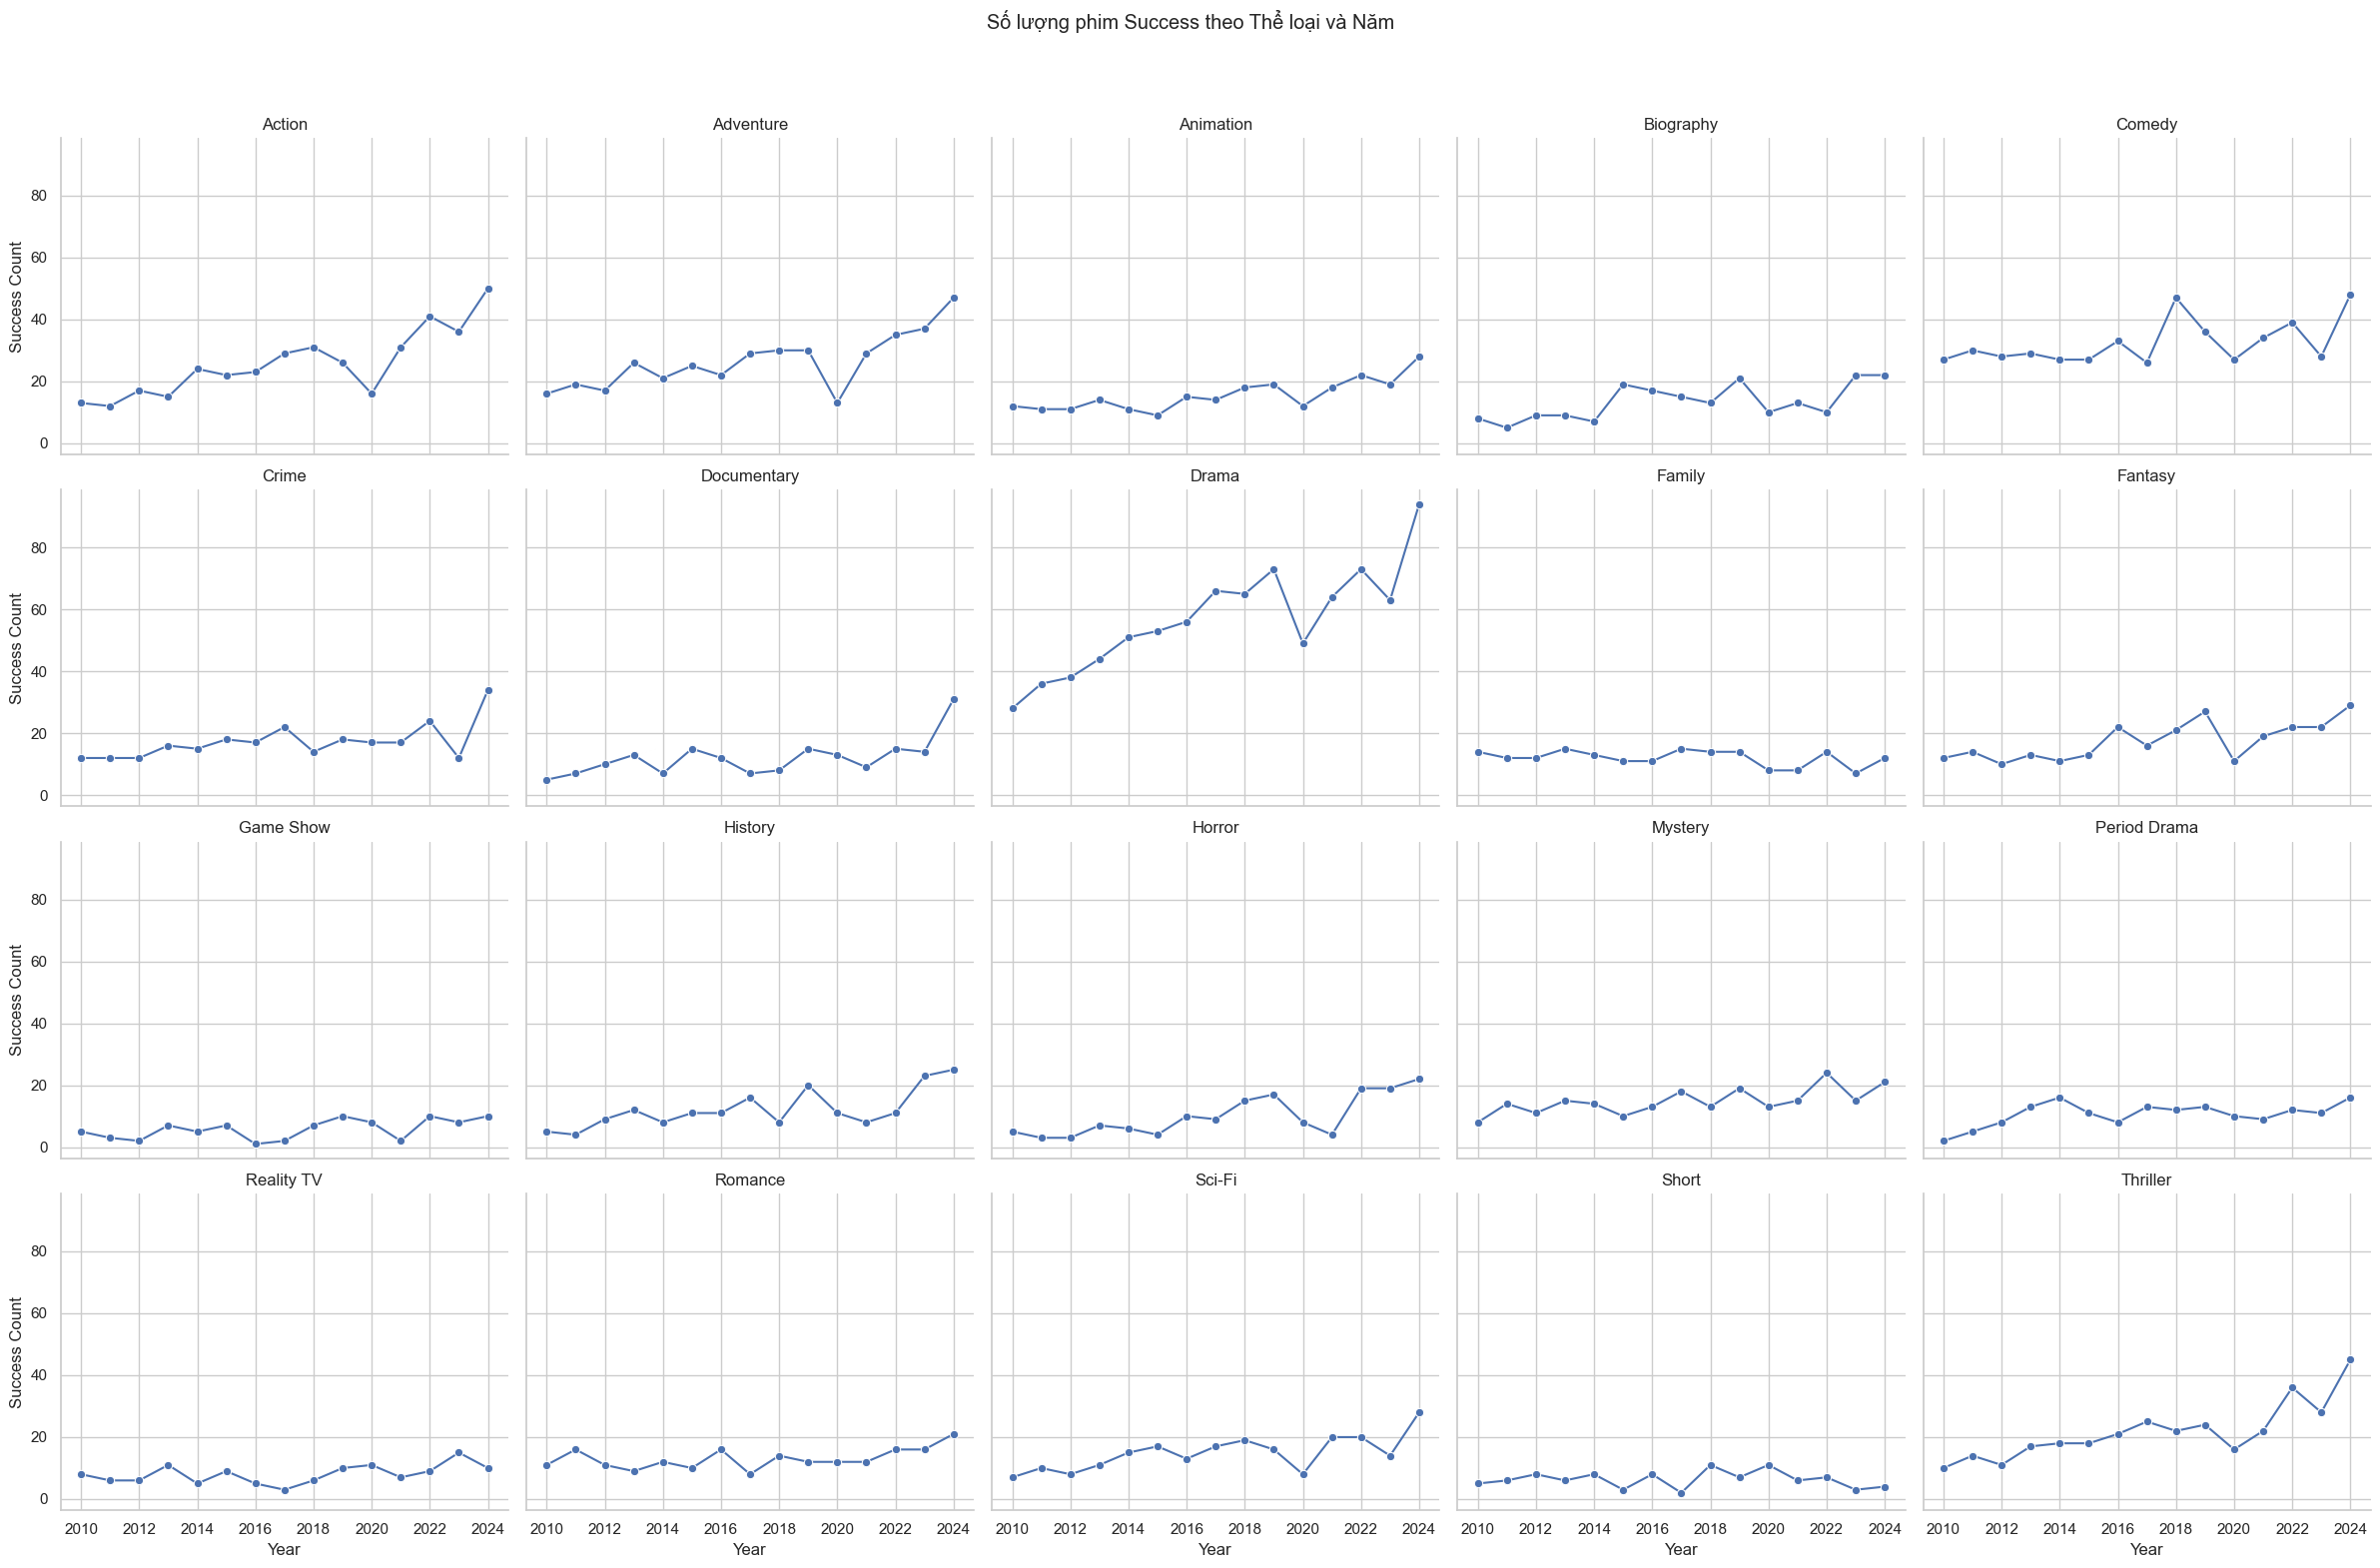

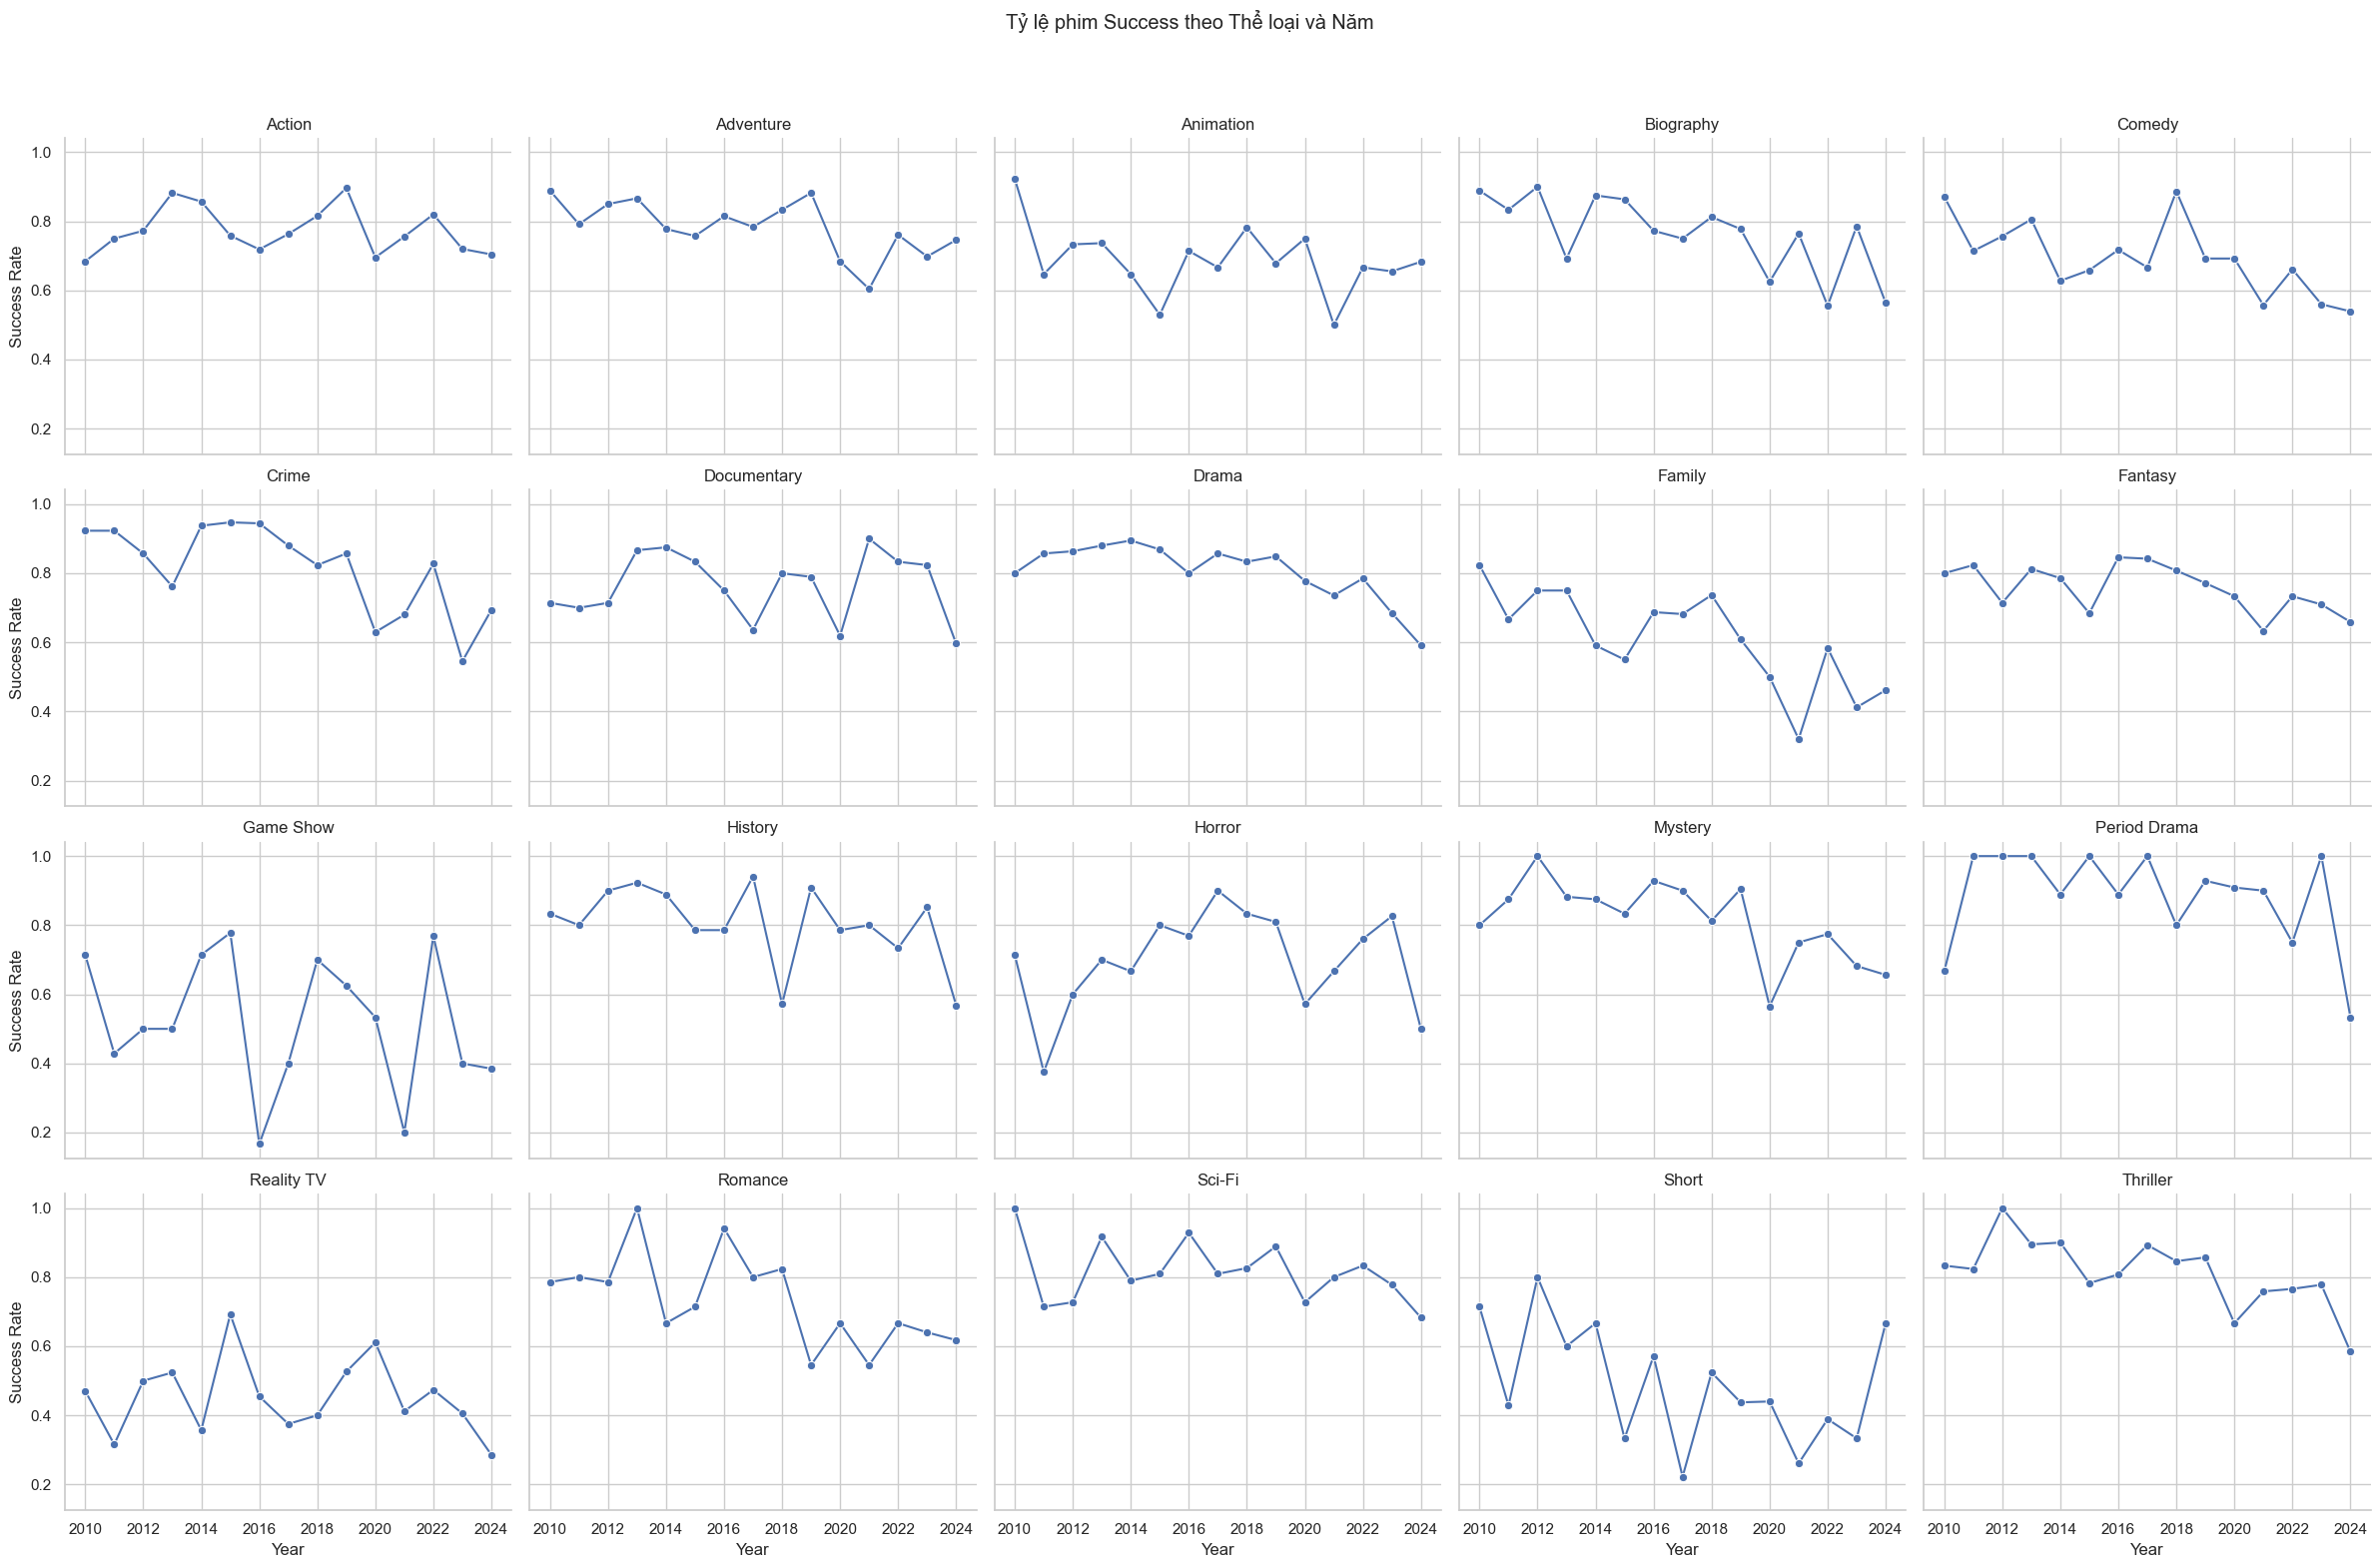

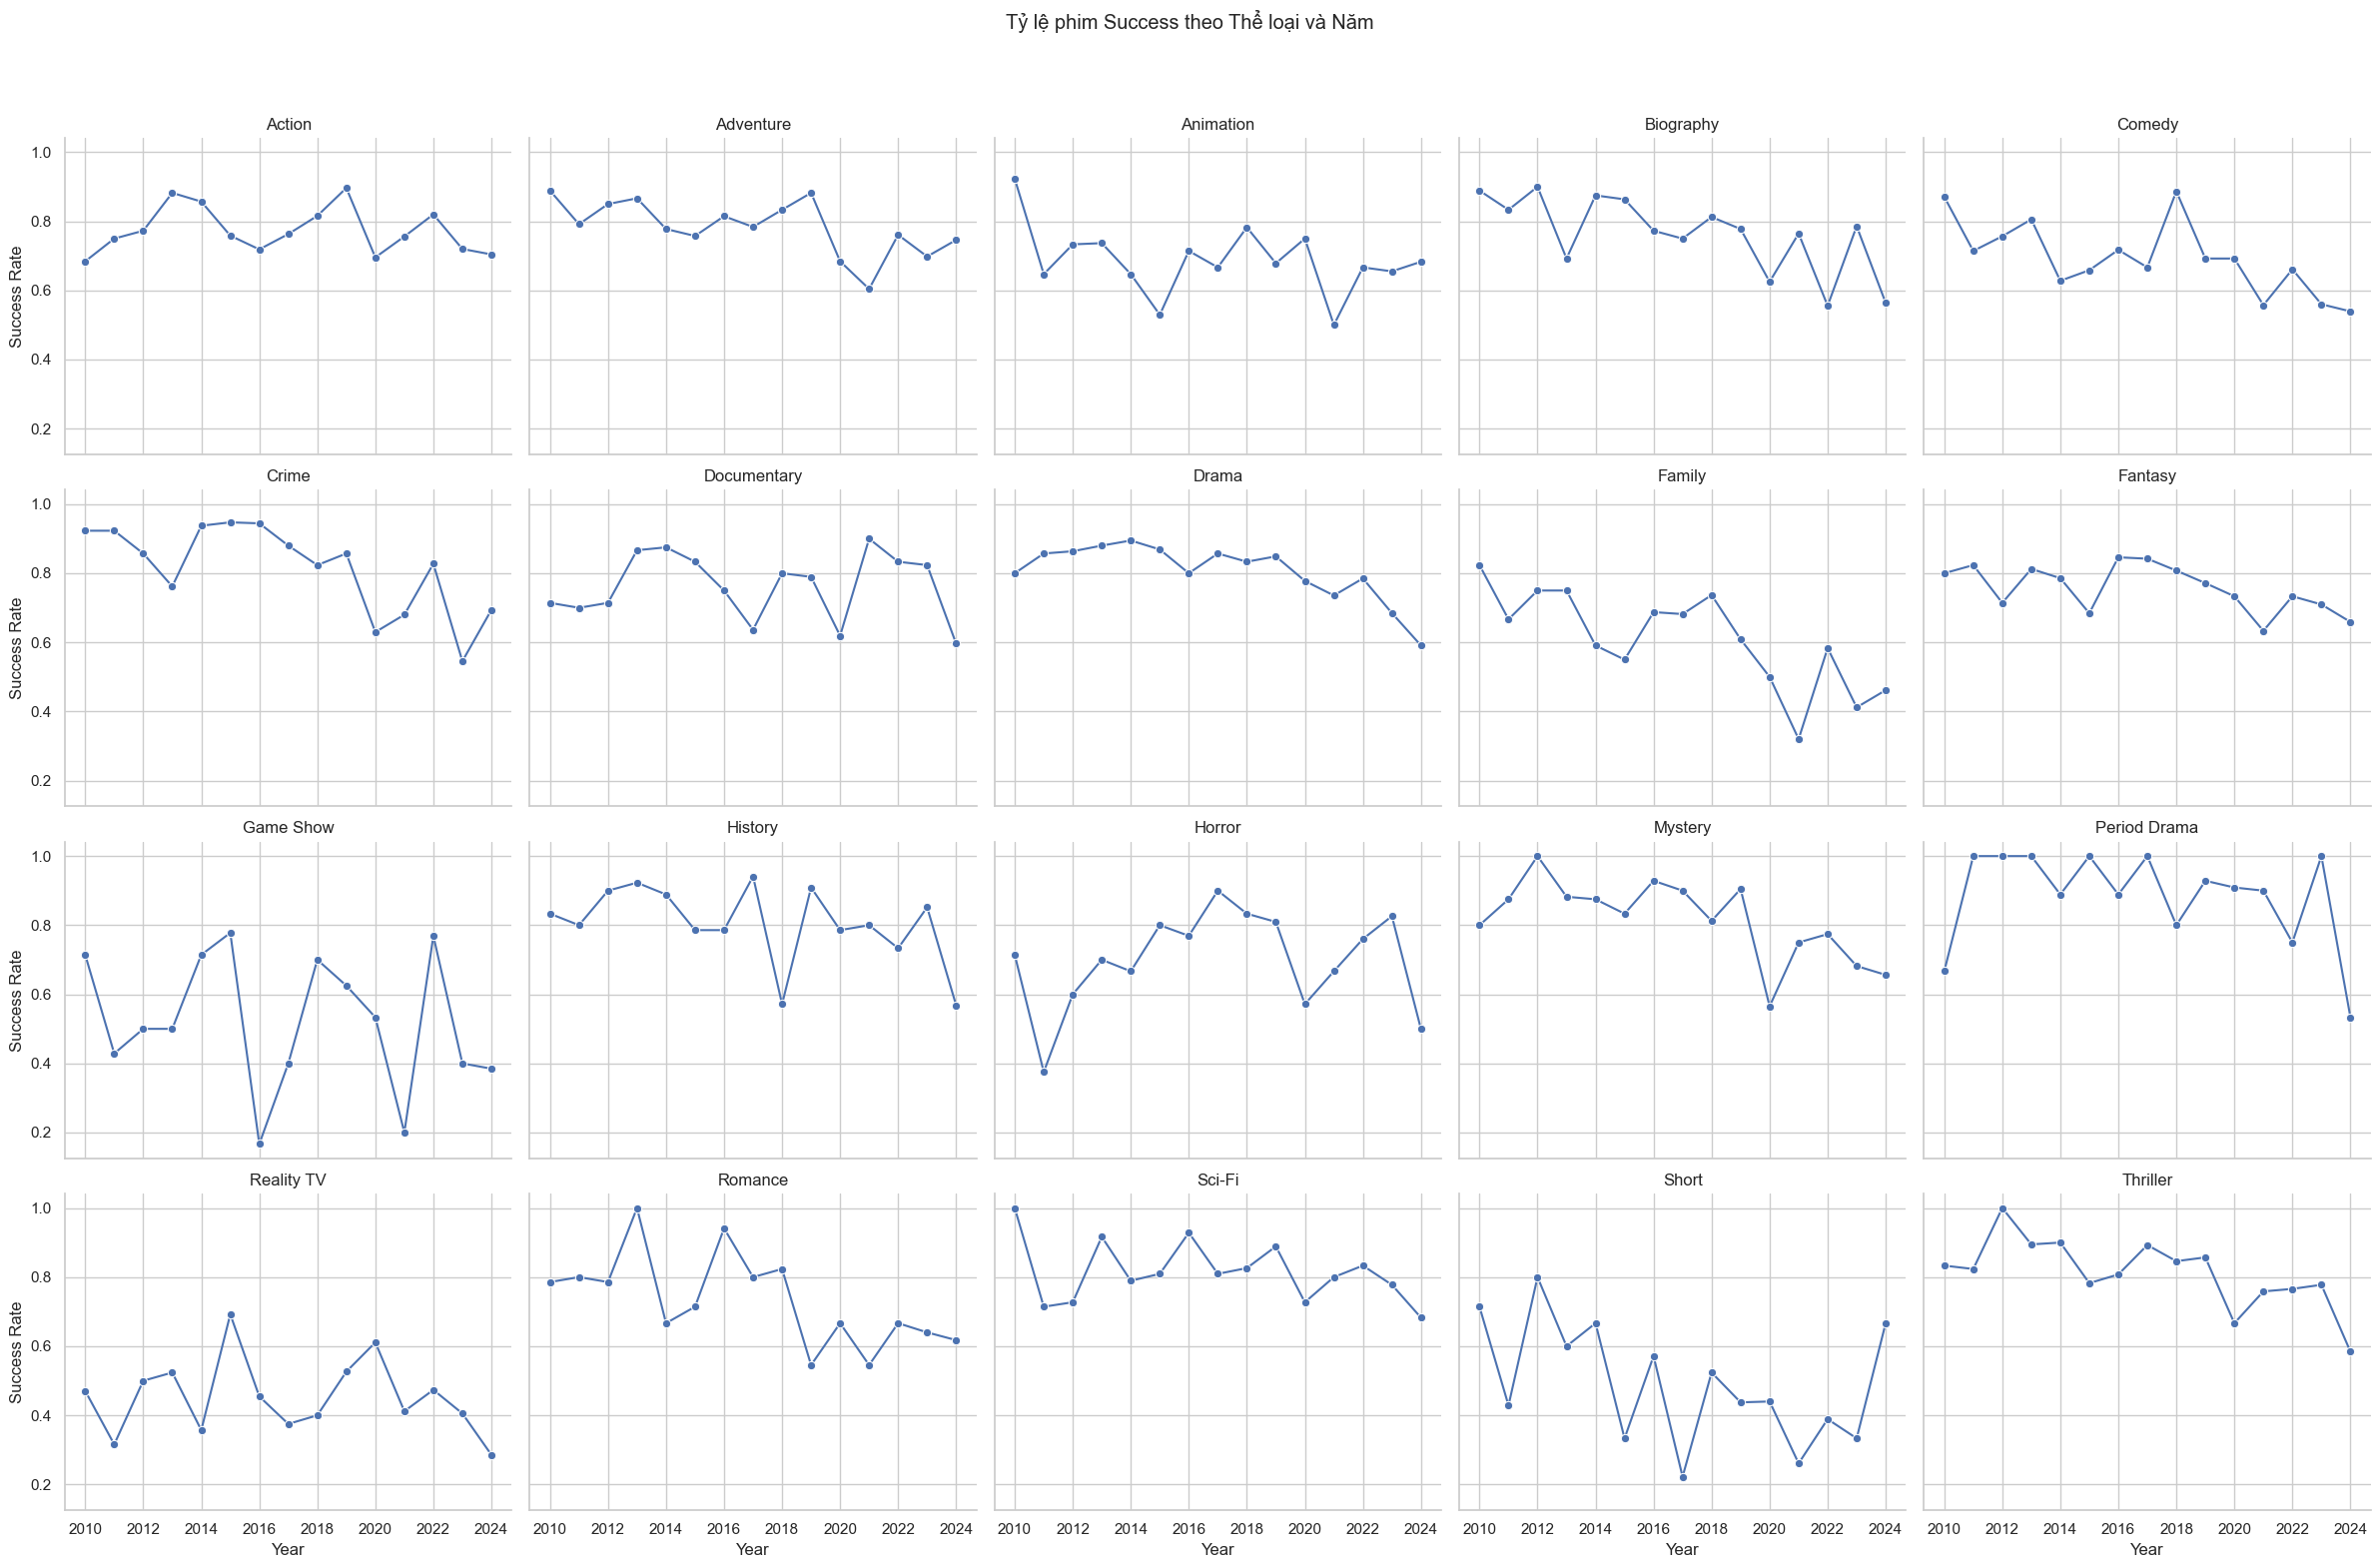

In [38]:
def plot_facet_line_chart(df, x_col, y_col, title, hue, xlabel, ylabel):
    g = sns.FacetGrid(df, col=hue, col_wrap=5, height=4, aspect=1.2)
    g.map_dataframe(sns.lineplot, x=x_col, y=y_col, marker='o')
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels(xlabel, ylabel)
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(title)
    plt.show()

plot_facet_line_chart(filtered_agg_df, 'Year', 'count', 'Số lượng phim theo Thể loại và Năm', 'Genre', 'Year', 'Số lượng phim')
plot_facet_line_chart(filtered_agg_df, 'Year', 'avg_rating', 'Điểm trung bình Rating theo Thể loại và Năm', 'Genre', 'Year', 'Average Rating')
plot_facet_line_chart(filtered_agg_df, 'Year', 'avg_no_of_votes', 'Số lượng Vote trung bình theo Thể loại và Năm', 'Genre', 'Year', 'Average Votes')
plot_facet_line_chart(filtered_agg_df, 'Year', 'avg_meta_score', 'Meta Score trung bình theo Thể loại và Năm', 'Genre', 'Year', 'Average Meta Score')
plot_facet_line_chart(filtered_agg_df, 'Year', 'success_count', 'Số lượng phim Success theo Thể loại và Năm', 'Genre', 'Year', 'Success Count')
plot_facet_line_chart(filtered_agg_df, 'Year', 'success_rate', 'Tỷ lệ phim Success theo Thể loại và Năm', 'Genre', 'Year', 'Success Rate')
plot_facet_line_chart(filtered_agg_df, 'Year', 'success_rate', 'Tỷ lệ phim Success theo Thể loại và Năm', 'Genre', 'Year', 'Success Rate')


In [39]:
filtered_score_movies = filtered_movies.dropna(subset=["rating", "no_of_votes", "meta_score"])
filtered_score_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 5 to 4994
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          983 non-null    object 
 1   genres        983 non-null    object 
 2   type          983 non-null    object 
 3   rating        983 non-null    float64
 4   no_of_votes   983 non-null    float64
 5   meta_score    983 non-null    float64
 6   release_date  983 non-null    float64
 7   gross         875 non-null    float64
 8   budget        695 non-null    float64
 9   countries     983 non-null    object 
 10  url           983 non-null    object 
 11  ROI           666 non-null    float64
 12  result        983 non-null    object 
dtypes: float64(7), object(6)
memory usage: 107.5+ KB


In [40]:
top_10_genres_df

Genre  Count
9           Drama   1094
16         Comedy    718
7       Adventure    515
6          Action    503
14       Thriller    423
17        Fantasy    351
8       Animation    346
12          Crime    329
25         Family    301
13        Mystery    281
19         Sci-Fi    279
48        Romance    278
163    Reality TV    275
92      Biography    271
148   Documentary    246
38        History    234
18         Horror    218
134         Short    203
37   Period Drama    187
174     Game Show    169

In [41]:
avg_score_top_10_genres = []
for _, row in top_10_genres_df.iterrows():
    meta_score = 0
    rating = 0
    no_of_votes = 0
    count = 0
    gross = 0
    for _, movie in filtered_score_movies.dropna(subset=["gross"]).iterrows():
        if row["Genre"] in movie["genres"]:
            count += 1
            meta_score += movie["meta_score"]
            rating += movie["rating"]
            no_of_votes += movie["no_of_votes"]
            gross += movie["gross"]
    avg_score_top_10_genres.append({
        "gross": gross / count,
        "Genre": row["Genre"],
        "meta_score": meta_score / count,
        "rating": rating / count,
        "no_of_votes": no_of_votes / count
    })
avg_score_top_10_genres_df = pd.DataFrame(avg_score_top_10_genres)
avg_score_top_10_genres_df

ZeroDivisionError: division by zero

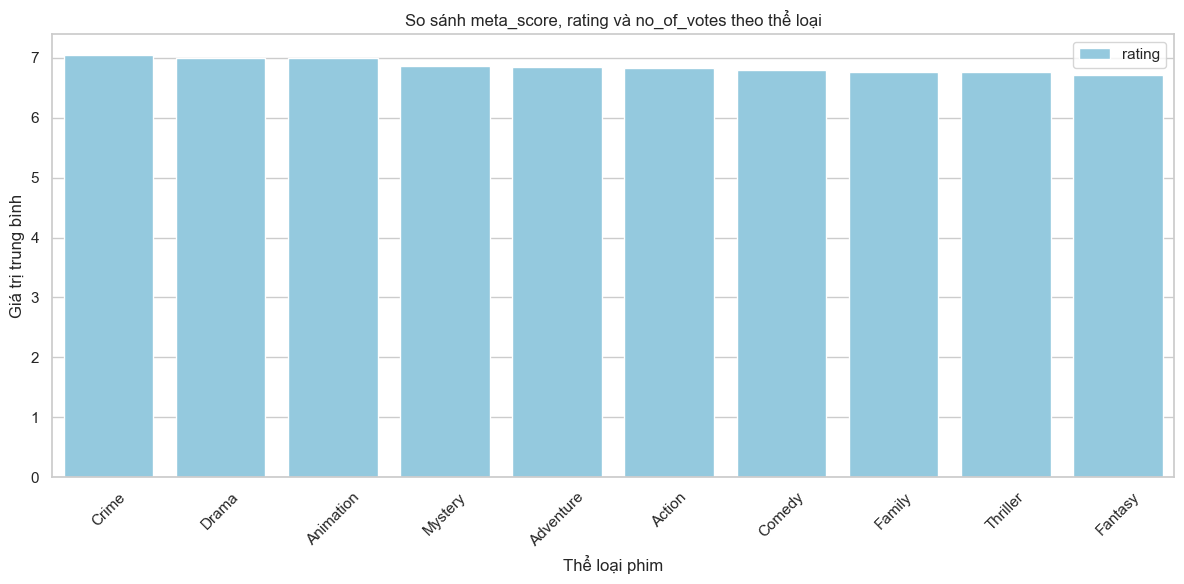

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_score_top_10_genres_df.sort_values("rating", ascending=False), x='Genre', y='rating', color='skyblue', label='rating')

plt.title('So sánh meta_score, rating và no_of_votes theo thể loại')
plt.ylabel('Giá trị trung bình')
plt.xlabel('Thể loại phim')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

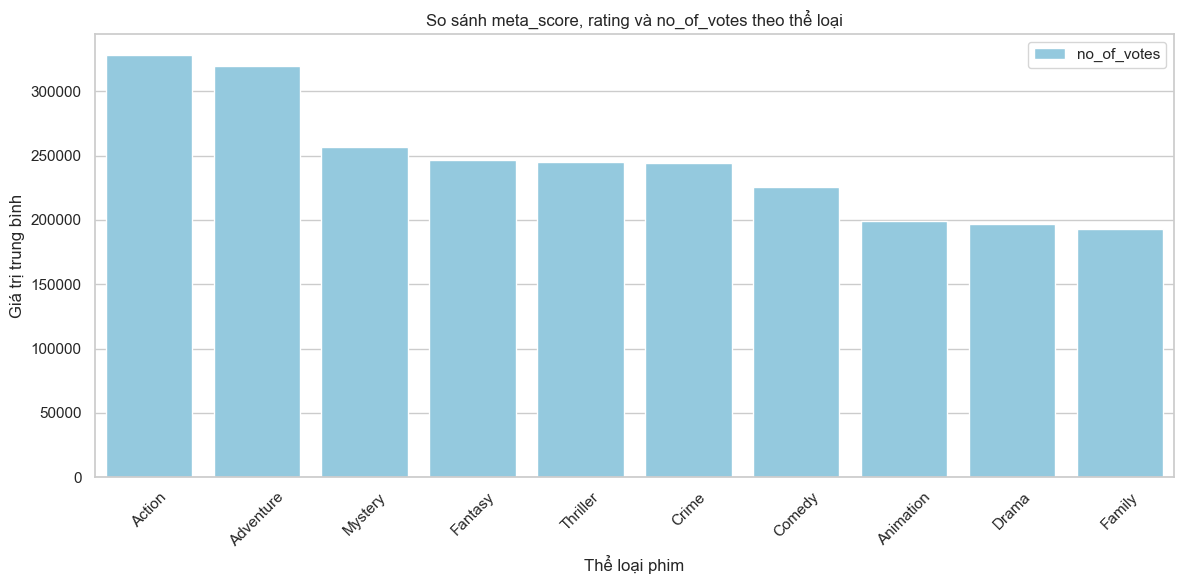

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_score_top_10_genres_df.sort_values("no_of_votes", ascending=False), x='Genre', y='no_of_votes', color='skyblue', label='no_of_votes')

plt.title('So sánh meta_score, rating và no_of_votes theo thể loại')
plt.ylabel('Giá trị trung bình')
plt.xlabel('Thể loại phim')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

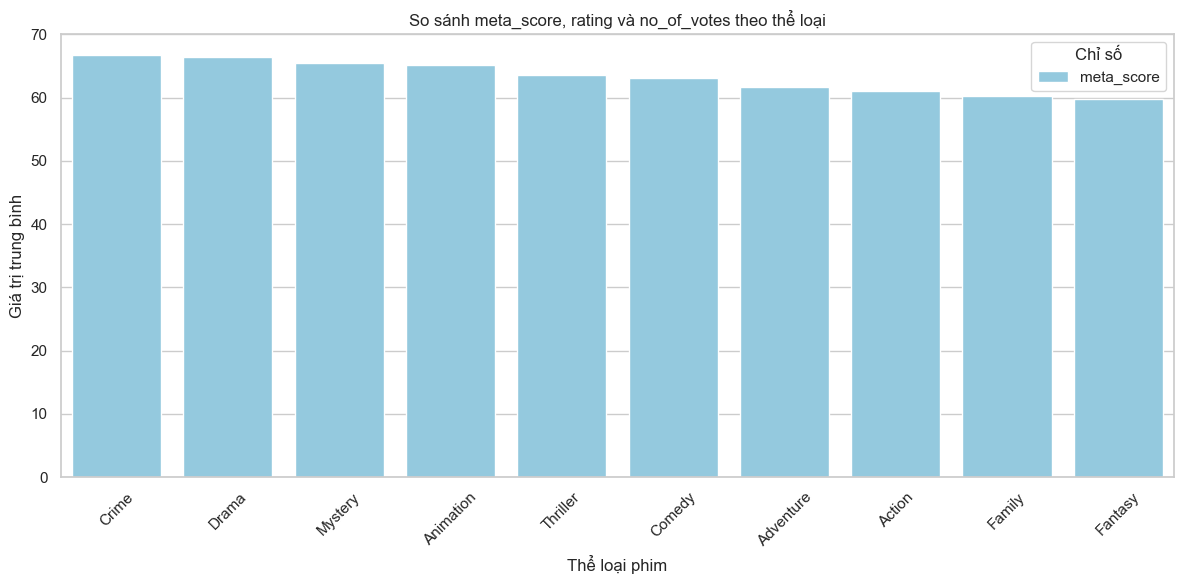

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_score_top_10_genres_df.sort_values("meta_score", ascending=False), x='Genre', y='meta_score', color='skyblue', label='meta_score')

plt.title('So sánh meta_score, rating và no_of_votes theo thể loại')
plt.ylabel('Giá trị trung bình')
plt.xlabel('Thể loại phim')
plt.xticks(rotation=45)
plt.legend(title='Chỉ số')

plt.tight_layout()
plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

df = avg_score_top_10_genres_df.copy()

# Chọn các cột cần chuẩn hóa
cols_to_scale = ['meta_score', 'rating', 'no_of_votes']

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print(df_scaled)

          gross      Genre  meta_score    rating  no_of_votes
0  1.145242e+08      Drama    0.966280  0.877070     0.026689
1  2.553417e+08     Comedy    0.476410  0.259984     0.239923
2  4.763141e+08  Adventure    0.272977  0.418635     0.937613
3  3.557331e+08     Action    0.185830  0.362511     1.000000
4  1.353417e+08   Thriller    0.557906  0.143186     0.386810
5  4.292530e+08    Fantasy    0.000000  0.000000     0.398014
6  4.420968e+08  Animation    0.773437  0.864536     0.044384
7  1.569181e+08      Crime    1.000000  1.000000     0.380219
8  4.448467e+08     Family    0.067284  0.181641     0.000000
9  1.396689e+08    Mystery    0.820925  0.447774     0.470525


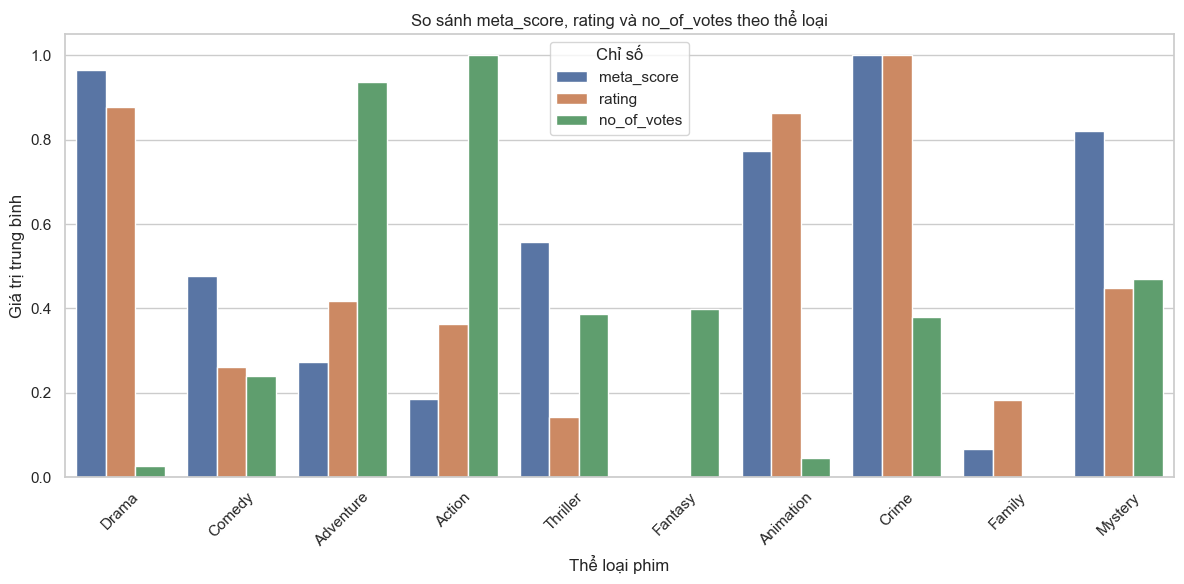

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử avg_score_top_10_genres_df đã sẵn sàng
df = df_scaled

# Chuyển DataFrame về dạng "long" để seaborn dễ dùng
df_melt = df.melt(id_vars='Genre', value_vars=['meta_score', 'rating', 'no_of_votes'],
                  var_name='Score Type', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt, x='Genre', y='Value', hue='Score Type')

plt.title('So sánh meta_score, rating và no_of_votes theo thể loại')
plt.ylabel('Giá trị trung bình')
plt.xlabel('Thể loại phim')
plt.xticks(rotation=45)
plt.legend(title='Chỉ số')

plt.tight_layout()
plt.show()


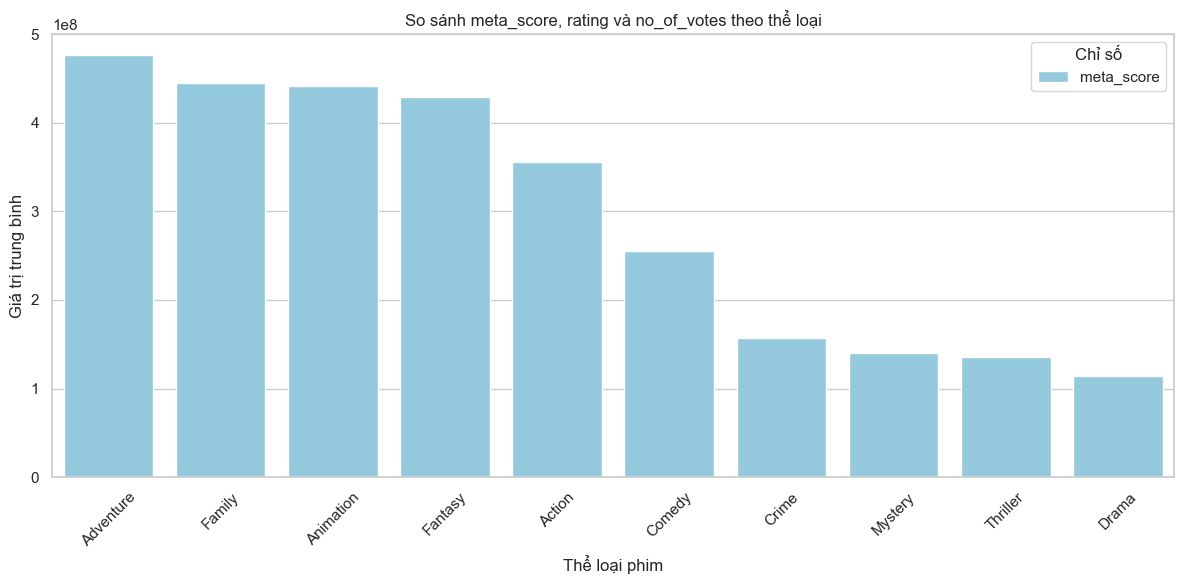

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_score_top_10_genres_df.sort_values("gross", ascending=False), x='Genre', y='gross', color='skyblue', label='meta_score')

plt.title('So sánh meta_score, rating và no_of_votes theo thể loại')
plt.ylabel('Giá trị trung bình')
plt.xlabel('Thể loại phim')
plt.xticks(rotation=45)
plt.legend(title='Chỉ số')

plt.tight_layout()
plt.show()